#  1.Introduction ☀️
This is a tutorial for the Saprot machine learning model, using the CAPE competition dataset (RhlA). It will guide you through all the steps from background introduction, data loading, model training, predicting results, and submitting results to get scored on the leaderboard. By the end of this tutorial, you will learn how to train your own machine learning model and submit the results.

If you have never coded before or have no experience in machine learning, don't worry! No prior experience is required in this tutorial, just a few clicks are enough.
**PLEASE set the runtime type AS FOLLOW PICTURE at first**

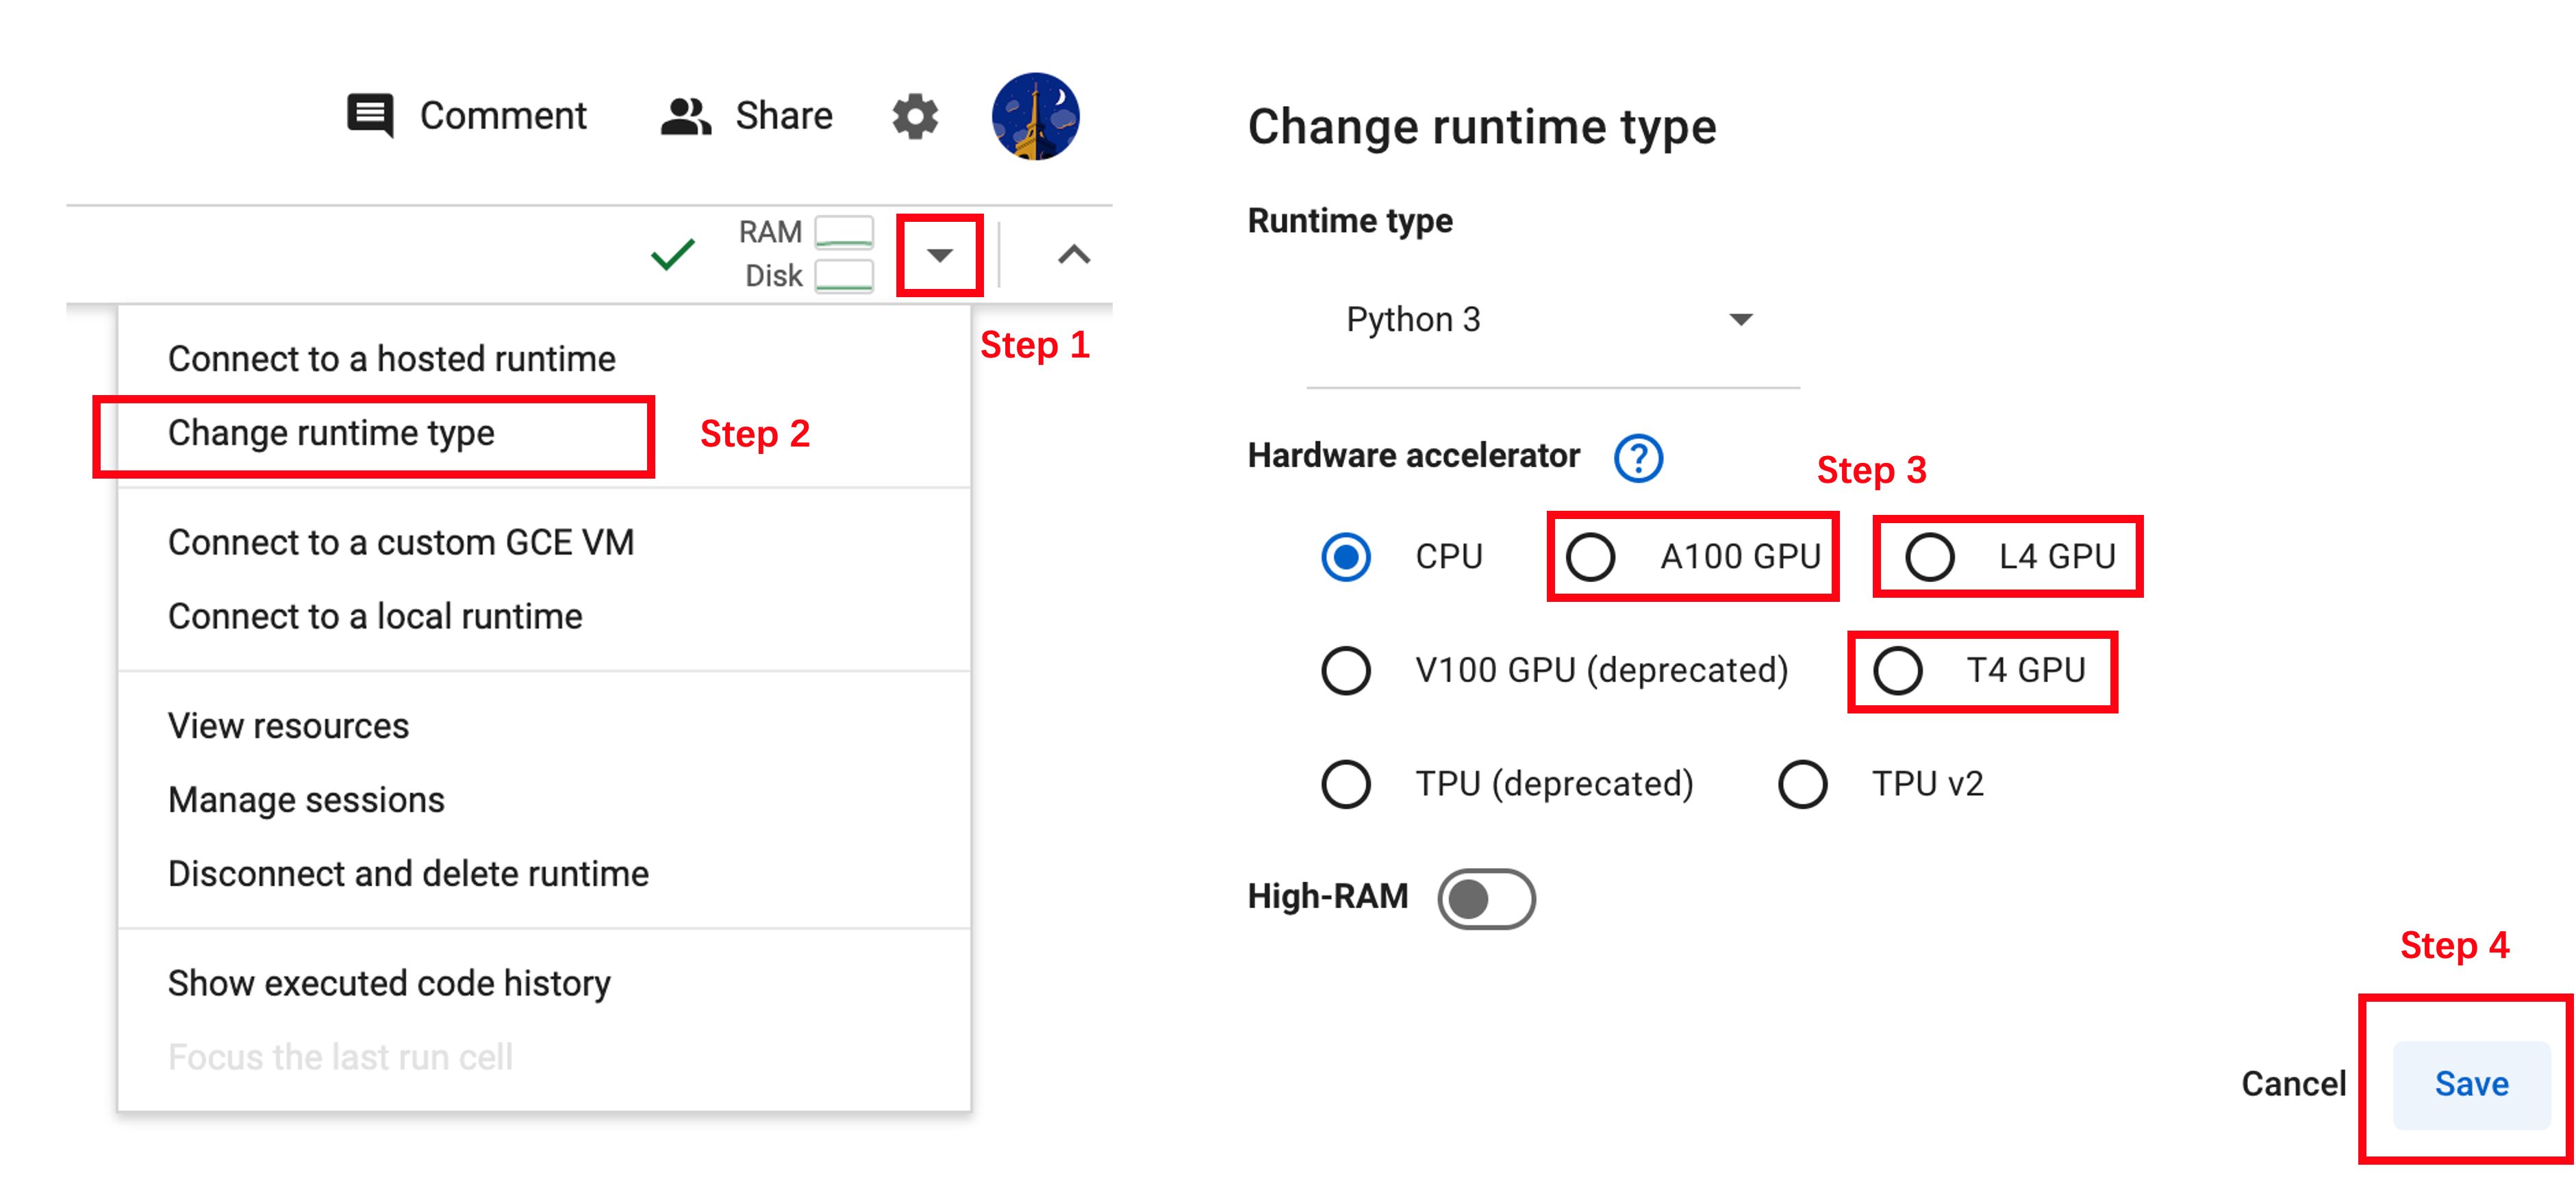

## Project Background ☀️
- **Challenges in Industrial Applications of Rhamnolipids**: Rhamnolipids are highly efficient biosurfactants with a wide range of applications, but their large-scale application is limited due to high production costs (particularly separation costs).
- **Importance of Modifying the Biosynthesis Pathway**: By modifying the biosynthesis pathway of rhamnolipids, separation costs can be reduced, promoting industrial applications and achieving green alternatives.
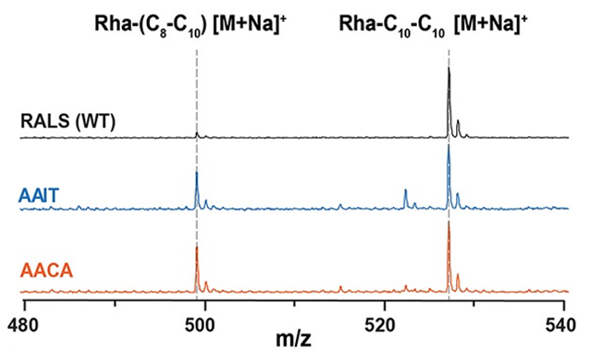


### Google Colab Introduction
Google Colab is a free online tool for writing and running Python code directly in your browser. It’s great for data science and machine learning projects.

### How to Run Code
In Colab, write your code in a gray cell. To execute it, either:
- Click the "Run" button (triangle icon) on the left side of the cell.
- Press `[Shift] + [Enter]` on your keyboard.

For example: Click <img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/run_button.png?raw=true' height='25px' width='25px' align='center'>  or press `[Shift] + [Enter]` to see the output below the cell.

In [ ]:
print("Hello world!")

Hello world!



# 2.Dataset Introduction and Usage 😋
- **RhlA (Uniprot id: Q51559, PDB id: 8IK2)** is a key enzyme responsible for the synthesis of the hydrophobic module in rhamnolipids. RhlA determines the length and unsaturation of the fatty acid chain, thereby affecting the physicochemical properties and bioactivity of rhamnolipids.

- **Significance of Modifying RhlA**: Engineering modifications to RhlA can better control the structure of the fatty acid chain, enhancing rhamnolipid yield and its potential for application.

## Dataset Description 📑

#### "Saprot_CAPE_dataset_train.csv" (Training Dataset)
- A CSV file containing 1593 sequences.
- The first column is "protein", representing the combination of mutations at 6 critical amino acid positions (located at positions 74, 101, 143, 148, 173, and 176).
- The next column is the enzyme functional evaluation metric "label": representing the overall activity yield.

#### "Saprot_CAPE_dataset_test.csv" (Testing Dataset)
- Contains 925 new sequences, with sequence information only.
- You need to predict the activity of these sequences to evaluate the model's performance. You can submit the predictions to Kaggle to get model feedback.

### Dataset Processing Code 📊
The code below demonstrates how to process and download the dataset using pandas in Colab. Click <img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/run_button.png?raw=true' height='25px' width='25px' align='center'> to run.

In [ ]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the original datasets
url_train = 'https://raw.githubusercontent.com/KRATSZ/CAPE-2023/main/Dataset/training.csv'
url_test = 'https://raw.githubusercontent.com/KRATSZ/CAPE-2023/main/Dataset/test.csv'
# Load the training dataset
train_df = pd.read_csv(url_train)
# Load the test dataset
test_df = pd.read_csv(url_test)

# Step 2: Transform the training dataset format
train_df_target = train_df[['Sequence', 'Activity']].rename(columns={'Sequence': 'protein', 'Activity': 'label'})
print("Transformed Training Dataset:")
print(train_df_target.head())
train_df_target.to_csv('/content/Saprot_CAPE_dataset_train.csv', index=False)

# Step 3: Transform the testing dataset format
test_df_target = test_df[['Sequence']].rename(columns={'Sequence': 'protein'})
print("Transformed Testing Dataset:")
print(test_df_target.head())
test_df_target.to_csv('/content/Saprot_CAPE_dataset_test.csv', index=False)

from google.colab import files
# Download the transformed datasets
files.download('/content/Saprot_CAPE_dataset_train.csv')
files.download('/content/Saprot_CAPE_dataset_test.csv')

Transformed Training Dataset:
  protein  label
0  RAQLSQ  1.000
1  AAQLSQ  3.228
2  CAQLSQ  2.170
3  DAQLSQ  1.759
4  EAQLSQ  1.531
Transformed Testing Dataset:
  protein
0  AACCAD
1  AACCTQ
2  AADCSM
3  AADQTQ
4  AADTLQ


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This code converts the training and testing datasets into a format suitable for analysis and allows you to download them from Colab for further research and modeling.



#  3.Saprot Model: Making Protein Modeling Easier 🌐

[SaProt](https://github.com/westlake-repl/SaProt) is a pretrained protein language model designed for various protein-related tasks. In this tutorial, we will use Saprot to guide you through the process of fine-tuning the model with data and predicting your own high-performance sequences.

###  Train a model
Upload data to train a model with just one click, You can follow these steps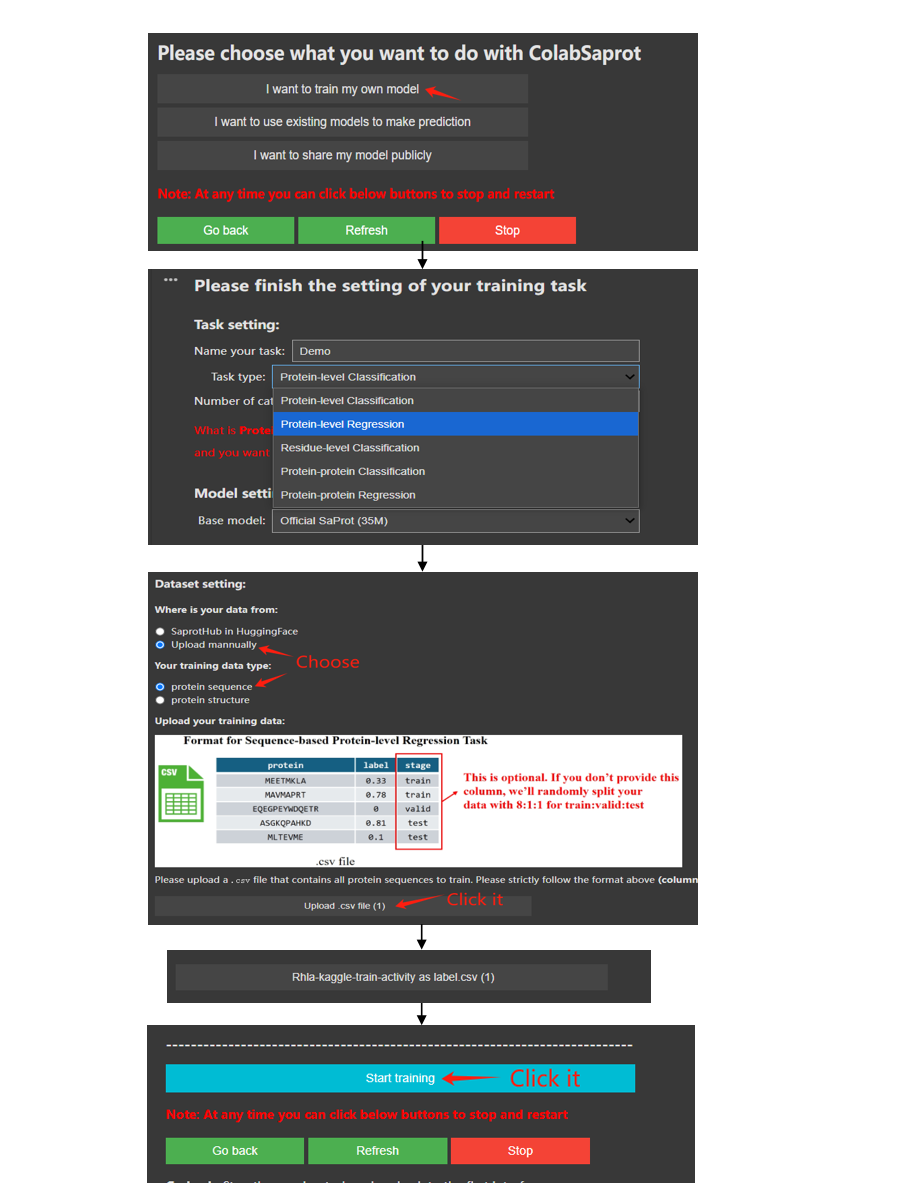

In [ ]:
#@title **Click the run button**

#@markdown ### Hint:
#@markdown - It takes 3-8 minutes for the initial installation.
#@markdown - <img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/run_button.png?raw=true' height='25px' width='25px' align='center'> signifies that the program is currently inactive and requires your intervention to initiate. Upon clicking, the button will transit into a dynamic state, represented by <img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/run_button_working.png?raw=true' height='25px' width='25px' align='center'>, indicating that the program is now in operation. You can then begin using the program once the interface is fully displayed.

################################################################################
########################### install saprot #####################################
################################################################################
%load_ext autoreload
%autoreload 2

import os
# Check whether the server is local or from google cloud
root_dir = os.getcwd()

from google.colab import output
# output.enable_custom_widget_manager()

try:
  import sys
  sys.path.append(f"{root_dir}/SaprotHub")
  import saprot
  print("SaProt is installed successfully!")
  os.system(f"chmod +x {root_dir}/SaprotHub/bin/*")

except ImportError:
  print("Installing SaProt...")
  os.system(f"rm -rf {root_dir}/SaprotHub")
  # !rm -rf /content/SaprotHub/

  !git clone https://github.com/westlake-repl/SaprotHub.git

  # !pip install /content/SaprotHub/saprot-0.4.7-py3-none-any.whl
  os.system(f"pip install -r {root_dir}/SaprotHub/requirements.txt")
  # !pip install -r /content/SaprotHub/requirements.txt

  os.system(f"pip install {root_dir}/SaprotHub")


  os.system(f"mkdir -p {root_dir}/SaprotHub/LMDB")
  os.system(f"mkdir -p {root_dir}/SaprotHub/bin")
  os.system(f"mkdir -p {root_dir}/SaprotHub/output")
  os.system(f"mkdir -p {root_dir}/SaprotHub/datasets")
  os.system(f"mkdir -p {root_dir}/SaprotHub/adapters/classification/Local")
  os.system(f"mkdir -p {root_dir}/SaprotHub/adapters/regression/Local")
  os.system(f"mkdir -p {root_dir}/SaprotHub/adapters/token_classification/Local")
  os.system(f"mkdir -p {root_dir}/SaprotHub/adapters/pair_classification/Local")
  os.system(f"mkdir -p {root_dir}/SaprotHub/adapters/pair_regression/Local")
  os.system(f"mkdir -p {root_dir}/SaprotHub/structures")

  os.system("pip install jupyter_ui_poll")

  # !mkdir -p /content/SaprotHub/LMDB
  # !mkdir -p /content/SaprotHub/bin
  # !mkdir -p /content/SaprotHub/output
  # !mkdir -p /content/SaprotHub/datasets
  # !mkdir -p /content/SaprotHub/adapters/classification/Local
  # !mkdir -p /content/SaprotHub/adapters/regression/Local
  # !mkdir -p /content/SaprotHub/adapters/token_classification/Local
  # !mkdir -p /content/SaprotHub/adapters/pair_classification/Local
  # !mkdir -p /content/SaprotHub/adapters/pair_regression/Local
  # !mkdir -p /content/SaprotHub/structures

  # !pip install gdown==v4.6.3 --force-reinstall --quiet
  # os.system(
  #   f"wget 'https://drive.usercontent.google.com/download?id=1B_9t3n_nlj8Y3Kpc_mMjtMdY0OPYa7Re&export=download&authuser=0' -O {root_dir}/SaprotHub/bin/foldseek"
  # )

  os.system(f"chmod +x {root_dir}/SaprotHub/bin/*")
  # !chmod +x /content/SaprotHub/bin/foldseek
  import sys
  sys.path.append(f"{root_dir}/SaprotHub")

  # !mv /content/SaprotHub/ColabSaprotSetup/foldseek /content/SaprotHub/bin/

################################################################################
################################################################################
################################## global ######################################
################################################################################
################################################################################

import ipywidgets
import pandas as pd
import torch
import numpy as np
import lmdb
import base64
import copy
import os
import json
import zipfile
import yaml
import argparse
import pprint
import subprocess
import py3Dmol
import matplotlib.pyplot as plt
import shutil
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from loguru import logger
from easydict import EasyDict
from colorama import init, Fore, Back, Style
from IPython.display import clear_output
from huggingface_hub import snapshot_download
from ipywidgets import HTML
from IPython.display import display
from google.colab import widgets
from google.colab import files
from pathlib import Path
from tqdm import tqdm
from datetime import datetime
from transformers import AutoTokenizer, EsmForProteinFolding, EsmTokenizer
from transformers.models.esm.openfold_utils.protein import to_pdb, Protein as OFProtein
from transformers.models.esm.openfold_utils.feats import atom14_to_atom37
from string import ascii_uppercase,ascii_lowercase
from saprot.utils.mpr import MultipleProcessRunnerSimplifier
from saprot.data.parse import get_chain_ids
from saprot.scripts.training import my_load_model
from safetensors import safe_open

DATASET_HOME = Path(f'{root_dir}/SaprotHub/datasets')
ADAPTER_HOME = Path(f'{root_dir}/SaprotHub/adapters')
STRUCTURE_HOME = Path(f"{root_dir}/SaprotHub/structures")
LMDB_HOME = Path(f'{root_dir}/SaprotHub/LMDB')
OUTPUT_HOME = Path(f'{root_dir}/SaprotHub/output')
UPLOAD_FILE_HOME = Path(f'{root_dir}/SaprotHub/upload_files')
FOLDSEEK_PATH = Path(f"{root_dir}/SaprotHub/bin/foldseek")
aa_set = {"A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"}
foldseek_struc_vocab = "pynwrqhgdlvtmfsaeikc#"

data_type_list = ["Single AA Sequence",
                  "Single SA Sequence",
                  "Single UniProt ID",
                  "Single PDB/CIF Structure",
                  "Multiple AA Sequences",
                  "Multiple SA Sequences",
                  "Multiple UniProt IDs",
                  "Multiple PDB/CIF Structures",
                  "SaprotHub Dataset",
                  "A pair of AA Sequences",
                  "A pair of SA Sequences",
                  "A pair of UniProt IDs",
                  "A pair of PDB/CIF Structures",
                  "Multiple pairs of AA Sequences",
                  "Multiple pairs of SA Sequences",
                  "Multiple pairs of UniProt IDs",
                  "Multiple pairs of PDB/CIF Structures",]

data_type_list_single = [
    "Single AA Sequence",
    "Single SA Sequence",
    "Single UniProt ID",
    "Single PDB/CIF Structure",
    "A pair of AA Sequences",
    "A pair of SA Sequences",
    "A pair of UniProt IDs",
    "A pair of PDB/CIF Structures",]

data_type_list_multiple = [
    "Multiple AA Sequences",
    "Multiple SA Sequences",
    "Multiple UniProt IDs",
    "Multiple PDB/CIF Structures",
    "Multiple pairs of AA Sequences",
    "Multiple pairs of SA Sequences",
    "Multiple pairs of UniProt IDs",
    "Multiple pairs of PDB/CIF Structures",]

task_type_dict = {
  "Protein-level Classification": "classification",
  "Residue-level Classification" : "token_classification",
  "Protein-level Regression" : "regression",
  "Protein-protein Classification": "pair_classification",
  "Protein-protein Regression": "pair_regression",
}
model_type_dict = {
  "classification" : "saprot/saprot_classification_model",
  "token_classification" : "saprot/saprot_token_classification_model",
  "regression" : "saprot/saprot_regression_model",
  "pair_classification" : "saprot/saprot_pair_classification_model",
  "pair_regression" : "saprot/saprot_pair_regression_model",
}
dataset_type_dict = {
  "classification": "saprot/saprot_classification_dataset",
  "token_classification" : "saprot/saprot_token_classification_dataset",
  "regression": "saprot/saprot_regression_dataset",
  "pair_classification" : "saprot/saprot_pair_classification_dataset",
  "pair_regression" : "saprot/saprot_pair_regression_dataset",
}
training_data_type_dict = {
  "Single AA Sequence": "AA",
  "Single SA Sequence": "SA",
  "Single UniProt ID": "SA",
  "Single PDB/CIF Structure": "SA",
  "Multiple AA Sequences": "AA",
  "Multiple SA Sequences": "SA",
  "Multiple UniProt IDs": "SA",
  "Multiple PDB/CIF Structures": "SA",
  "SaprotHub Dataset": "SA",
  "A pair of AA Sequences": "AA",
  "A pair of SA Sequences": "SA",
  "A pair of UniProt IDs": "SA",
  "A pair of PDB/CIF Structures": "SA",
  "Multiple pairs of AA Sequences": "AA",
  "Multiple pairs of SA Sequences": "SA",
  "Multiple pairs of UniProt IDs": "SA",
  "Multiple pairs of PDB/CIF Structures": "SA",
}


class font:
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'

    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

    RESET = '\033[0m'


################################################################################
############################### adapters #######################################
################################################################################
def get_adapters_list(task_type=None):

    adapters_list = []

    if task_type:
      raise
      # for file_path in (ADAPTER_HOME / task_type).glob('**/adapter_config.json'):
        # adapters_list.append(file_path.relative_to(ADAPTER_HOME / task_type).parent)
    else:
      for file_path in ADAPTER_HOME.glob('Local/**/adapter_config.json'):
        adapters_list.append(file_path.relative_to(ADAPTER_HOME).parent)

    return adapters_list

def adapters_text(adapters_list):
  input = ipywidgets.Text(
    value=None,
    placeholder='Enter SaprotHub Model ID',
    # description='Selected:',
    disabled=False)
  input.layout.width = '500px'
  display(input)

  return input

def adapters_dropdown(adapters_list):
  dropdown = ipywidgets.Dropdown(
    # options=[f"{adapter_path.parent.stem}/{adapter_path.stem}" for index, adapter_path in enumerate(adapters_list)],
    options=adapters_list,
    value=None,
    placeholder='Select a Local Model here',
    # description='Selected:',
    disabled=False)
  dropdown.layout.width = '500px'

  return dropdown

def adapters_combobox(adapters_list):
  combobox = ipywidgets.Combobox(
    options=[f"{adapter_path.parent.stem}/{adapter_path.stem}" for index, adapter_path in enumerate(adapters_list)],
    value=None,
    placeholder='Enter SaprotHub Model repository id or select a Local Model here',
    # description='Selected:',
    disabled=False)
  combobox.layout.width = '500px'
  display(combobox)

  return combobox

def adapters_selectmultiple(adapters_list):
  selectmulitiple = ipywidgets.SelectMultiple(
  # options=[f"{adapter_path.parent.stem}/{adapter_path.stem}" for index, adapter_path in enumerate(adapters_list)],
  options=adapters_list,
  value=[],
  #rows=10,
  placeholder='Select multiple models',
  # description='Fruits',
  disabled=False,
  layout={'width': '500px'})
  display(selectmulitiple)

  return selectmulitiple

def adapters_textmultiple(adapters_list):
  textmultiple = ipywidgets.Text(
  value=None,
  placeholder='Enter multiple SaprotHub Model IDs, separated by commas.',
  # description='Fruits',
  disabled=False,
  layout={'width': '500px'})
  display(textmultiple)

  return textmultiple


def select_adapter_from(task_type, use_model_from):
  adapters_list = get_adapters_list(task_type)

  if use_model_from == 'Trained by yourself on ColabSaprot':
    return adapters_dropdown(adapters_list)

  elif use_model_from == 'Shared by peers on SaprotHub':
    print(Fore.BLUE+"SaprotHub Model:"+Style.RESET_ALL)
    return adapters_text(adapters_list)

  elif use_model_from == "Saved in your local computer":
    print(Fore.BLUE+"Click the button to upload the \"Model-<task_name>-<model_size>.zip\" file of your Model:"+Style.RESET_ALL)
    # 1. upload model.zip
    if task_type:
      adapter_upload_path = ADAPTER_HOME / task_type / "Local"
    else:
      adapter_upload_path = ADAPTER_HOME / "Local"

    adapter_zip_path = upload_file(adapter_upload_path)
    adapter_path = adapter_upload_path / adapter_zip_path.stem
    # 2. unzip model.zip
    with zipfile.ZipFile(adapter_zip_path, 'r') as zip_ref:
        zip_ref.extractall(adapter_path)
    os.remove(adapter_zip_path)
    # 3. check adapter_config.json
    adapter_config_path = adapter_path / "adapter_config.json"
    assert adapter_config_path.exists(), f"Can't find {adapter_config_path}"

    # # 4. move to correct folder
    # num_labels, task_type = get_num_labels_and_task_type_by_adapter(adapter_path)
    # shutil.move(adapter_path, ADAPTER_HOME / task_type)

    return EasyDict({"value":  f"Local/{adapter_zip_path.stem}"})

  elif use_model_from == "Multi-models on ColabSaprot":
    # 1. select the list of adapters
    print(Fore.BLUE+f"Local Model ({task_type}):"+Style.RESET_ALL)
    print(Fore.BLUE+f"Multiple values can be selected with \"shift\" and/or \"ctrl\" (or \"command\") pressed and mouse clicks or arrow keys."+Style.RESET_ALL)
    return adapters_selectmultiple(adapters_list)

  elif use_model_from == "Multi-models on SaprotHub":
    # 1. enter the list of adapters
    print(Fore.BLUE+f"SaprotHub Model IDs, separated by commas ({task_type}):"+Style.RESET_ALL)
    return adapters_textmultiple(adapters_list)



################################################################################
########################### download dataset ###################################
################################################################################
def download_dataset(task_name):
  import gdown
  import tarfile

  filepath = LMDB_HOME / f"{task_name}.tar.gz"
  download_links = {
    "ClinVar" : "https://drive.google.com/uc?id=1Le6-v8ddXa1eLJZFo7HPij7NhaBmNUbo",
    "DeepLoc_cls2" : "https://drive.google.com/uc?id=1dGlojkCt1DwUXWiUk4kXRGRNu5sz2uxf",
    "DeepLoc_cls10" : "https://drive.google.com/uc?id=1dGlojkCt1DwUXWiUk4kXRGRNu5sz2uxf",
    "EC" : "https://drive.google.com/uc?id=1VFLFA-jK1tkTZBVbMw8YSsjZqAqlVQVQ",
    "GO_BP" : "https://drive.google.com/uc?id=1DGiGErWbRnEK8jmE2Jpb996By8KVDBfF",
    "GO_CC" : "https://drive.google.com/uc?id=1DGiGErWbRnEK8jmE2Jpb996By8KVDBfF",
    "GO_MF" : "https://drive.google.com/uc?id=1DGiGErWbRnEK8jmE2Jpb996By8KVDBfF",
    "HumanPPI" : "https://drive.google.com/uc?id=1ahgj-IQTtv3Ib5iaiXO_ASh2hskEsvoX",
    "MetalIonBinding" : "https://drive.google.com/uc?id=1rwknPWIHrXKQoiYvgQy4Jd-efspY16x3",
    "ProteinGym" : "https://drive.google.com/uc?id=1L-ODrhfeSjDom-kQ2JNDa2nDEpS8EGfD",
    "Thermostability" : "https://drive.google.com/uc?id=1I9GR1stFDHc8W3FCsiykyrkNprDyUzSz",
  }

  try:
    gdown.download(download_links[task_name], str(filepath), quiet=False)
    with tarfile.open(filepath, 'r:gz') as tar:
      tar.extractall(path=str(LMDB_HOME))
      print(f"Extracted: {filepath}")
  except Exception as e:
    raise RuntimeError("The dataset has not prepared.")

################################################################################
############################# upload file ######################################
################################################################################
def upload_file(upload_path):
  upload_path = Path(upload_path)
  upload_path.mkdir(parents=True, exist_ok=True)
  basepath = Path().resolve()
  try:
    uploaded = files.upload()
    filenames = []
    for filename in uploaded.keys():
      filenames.append(filename)
      shutil.move(basepath / filename, upload_path / filename)
    if len(filenames) == 0:
      logger.info("The uploading process has been interrupted by the user.")
      raise RuntimeError("The uploading process has been interrupted by the user.")
  except Exception as e:
    logger.error("Upload file fail! Please click the button to run again.")
    raise(e)

  return upload_path / filenames[0]

################################################################################
############################ upload dataset ####################################
################################################################################

def read_csv_dataset(uploaded_csv_path):
  df = pd.read_csv(uploaded_csv_path)
  df.columns = df.columns.str.lower()
  return df

def check_column_label_and_stage(csv_dataset_path):
  df = read_csv_dataset(csv_dataset_path)
  assert {'label', 'stage'}.issubset(df.columns), f"Make sure your CSV dataset includes both `label` and `stage` columns!\nCurrent columns: {df.columns}"
  column_values = set(df['stage'].unique())
  assert all(value in column_values for value in ['train', 'valid', 'test']), f"Ensure your dataset includes samples for all three stages: `train`, `valid` and `test`.\nCurrent columns: {df.columns}"

def get_data_type(csv_dataset_path):
  # AA, SA, Pair AA, Pair SA
  df = read_csv_dataset(csv_dataset_path)

  # AA, SA
  if 'protein' in df.columns:
    second_token = df.loc[0, 'protein'][1]
    if second_token in aa_set:
      return "Multiple AA Sequences"
    elif second_token in foldseek_struc_vocab:
      return "Multiple SA Sequences"
    else:
      raise RuntimeError(f"The sequence in the dataset({csv_dataset_path}) are neither SA Sequences nor AA Sequences. Please check carefully.")

  # Pair AA, Pair SA
  elif 'protein_1' in df.columns and 'protein_2' in df.columns:
    second_token = df.loc[0, 'protein_1'][1]
    if second_token in aa_set:
      return "Multiple pairs of AA Sequences"
    elif second_token in foldseek_struc_vocab:
      return "Multiple pairs of SA Sequences"
    else:
      raise RuntimeError(f"The sequence in the dataset({csv_dataset_path}) are neither SA Sequences nor AA Sequences. Please check carefully.")

  else:
    print(df)
    raise Exception("Please check your dataset format. You are expected to strictly follow the examples we provide.")

def check_task_type_and_data_type(original_task_type, data_type):
  if "Protein-protein" in original_task_type:
    assert data_type == "SaprotHub Dataset" or "pair" in data_type, f"The current `data_type`({data_type}) is incompatible with the current `task_type`({original_task_type}). Please use Pair Sequence Datset for {original_task_type} task!"
  else:
    assert "pair" not in data_type, f"The current `data_type`({data_type}) is incompatible with the current `task_type`({original_task_type}). Please avoid using the Pair Sequence Dataset({data_type}) for the {original_task_type} task!"

def input_raw_data_by_data_type(data_type):

  # 0-2. 0. Single AA Sequence, 1. Single SA Sequence, 2. Single UniProt ID
  if data_type in data_type_list[:3]:
    input_seq = ipywidgets.Text(
      value=None,
      placeholder=f'Enter {data_type} here',
      disabled=False)
    input_seq.layout.width = '500px'
    print(Fore.BLUE+f"{data_type}"+Style.RESET_ALL)
    display(input_seq)
    return input_seq

  # 3. Single PDB/CIF Structure
  elif data_type == 'Single PDB/CIF Structure':
    input_chain = ipywidgets.Text(
      value="A",
      placeholder=f'Enter the name of chain here',
      disabled=False)
    input_chain.layout.width = '500px'
    print(Fore.BLUE+"Chain (to be extracted from the structure):"+Style.RESET_ALL)
    display(input_chain)

    print(Fore.BLUE+"Click to upload a .pdb/.cif file"+Style.RESET_ALL)
    pdb_file_path = upload_file(STRUCTURE_HOME)
    print(input_chain)
    return pdb_file_path.stem, input_chain

  # 4-7 & 13-16. Multiple Sequences
  elif data_type in data_type_list_multiple:
    print(Fore.BLUE+f"Please upload the .csv file which contains {data_type}"+Style.RESET_ALL)
    uploaded_csv_path = upload_file(UPLOAD_FILE_HOME)
    print(Fore.BLUE+"Successfully upload your .csv file!"+Style.RESET_ALL)
    print("="*100)

    if data_type in ['Multiple PDB/CIF Structures', 'Multiple pairs of PDB/CIF Structures']:
      # upload and unzip PDB files
      print(Fore.BLUE+f"Please upload your .zip file which contains {data_type} files"+Style.RESET_ALL)
      pdb_zip_path = upload_file(UPLOAD_FILE_HOME)
      if pdb_zip_path.suffix != ".zip":
        logger.error("The data type does not match. Please click the run button again to upload a .zip file!")
        raise RuntimeError("The data type does not match.")
      print(Fore.BLUE+"Successfully upload your .zip file!"+Style.RESET_ALL)
      print("="*100)

      import zipfile
      with zipfile.ZipFile(pdb_zip_path, 'r') as zip_ref:
        zip_ref.extractall(STRUCTURE_HOME)

    return uploaded_csv_path

  # 8. SaprotHub Dataset
  elif data_type == "SaprotHub Dataset":
    input_repo_id = ipywidgets.Text(
      value=None,
      placeholder=f'Copy and paste the SaprotHub Dataset ID here',
      disabled=False)
    input_repo_id.layout.width = '500px'
    print(Fore.BLUE+f"{data_type}"+Style.RESET_ALL)
    display(input_repo_id)
    return input_repo_id

  # 9-11. A pair of seq
  elif data_type in ["A pair of AA Sequences", "A pair of SA Sequences", "A pair of UniProt IDs"]:
    print()

    seq_type = data_type[len("A pair of "):-1]

    input_seq1 = ipywidgets.Text(
      value=None,
      placeholder=f'Enter the {seq_type} of Sequence 1 here',
      disabled=False)
    input_seq1.layout.width = '500px'
    print(Fore.BLUE+f"Sequence 1:"+Style.RESET_ALL)
    display(input_seq1)

    input_seq2 = ipywidgets.Text(
      value=None,
      placeholder=f'Enter the {seq_type} of Sequence 2 here',
      disabled=False)
    input_seq2.layout.width = '500px'
    print(Fore.BLUE+f"Sequence 2:"+Style.RESET_ALL)
    display(input_seq2)

    return (input_seq1, input_seq2)

  # 12. Pair Single PDB/CIF Structure
  elif data_type == 'A pair of PDB/CIF Structures':
    print("Please provide the structure type, chain and your structure file.")

    dropdown_type1 = ipywidgets.Dropdown(
      value="PDB",
      options=["PDB", "AF2"],
      disabled=False)
    dropdown_type1.layout.width = '500px'
    print(Fore.BLUE+"The first structure type:"+Style.RESET_ALL)
    display(dropdown_type1)

    input_chain1 = ipywidgets.Text(
      value="A",
      placeholder=f'Enter the name of chain of the first structure here',
      disabled=False)
    input_chain1.layout.width = '500px'
    print(Fore.BLUE+"Chain of the first structure:"+Style.RESET_ALL)
    display(input_chain1)

    print(Fore.BLUE+"Please upload a .pdb/.cif file"+Style.RESET_ALL)
    pdb_file_path1 = upload_file(STRUCTURE_HOME)


    dropdown_type2 = ipywidgets.Dropdown(
      value="PDB",
      options=["PDB", "AF2"],
      disabled=False)
    dropdown_type2.layout.width = '500px'
    print(Fore.BLUE+"The second structure type:"+Style.RESET_ALL)
    display(dropdown_type2)

    input_chain2 = ipywidgets.Text(
      value="A",
      placeholder=f'Enter the name of chain of the second structure here',
      disabled=False)
    input_chain2.layout.width = '500px'
    print(Fore.BLUE+"Chain of the second structure:"+Style.RESET_ALL)
    display(input_chain2)

    print(Fore.BLUE+"Please upload a .pdb/.cif file"+Style.RESET_ALL)
    pdb_file_path2 = upload_file(STRUCTURE_HOME)
    return (pdb_file_path1.stem, dropdown_type1, input_chain1, pdb_file_path2.stem, dropdown_type2, input_chain2)

def get_SA_sequence_by_data_type(data_type, raw_data):

  # Multiple sequences
  # raw_data = upload_files/xxx.csv

  # 8. SaprotHub Dataset
  if data_type == "SaprotHub Dataset":
    input_repo_id = raw_data
    REPO_ID = input_repo_id.value

    if REPO_ID.startswith('/'):
      return Path(REPO_ID)

    snapshot_download(repo_id=REPO_ID, repo_type="dataset", local_dir=DATASET_HOME / REPO_ID)
    csv_dataset_path = DATASET_HOME / REPO_ID / 'dataset.csv'
    assert csv_dataset_path.exists(), f"Can't find {csv_dataset_path}"
    protein_df = read_csv_dataset(csv_dataset_path)

    data_type = get_data_type(csv_dataset_path)

    return get_SA_sequence_by_data_type(data_type, csv_dataset_path)

    # # AA, SA
    # if data_type == "Multiple AA Sequences":
    #   for index, value in protein_df['sequence'].items():
    #     sa_seq = ''
    #     for aa in value:
    #       sa_seq += aa + '#'
    #     protein_df.at[index, 'sequence'] = sa_seq

    # # Pair AA, Pair SA
    # elif data_type in ["Multiple pairs of AA Sequences", "Multiple pairs of SA Sequences"]:
    #   for i in ['1', '2']:
    #     if data_type == "Multiple pairs of AA Sequences":
    #       for index, value in protein_df[f'sequence_{i}'].items():
    #         sa_seq = ''
    #         for aa in value:
    #           sa_seq += aa + '#'
    #         protein_df.at[index, f'sequence_{i}'] = sa_seq

    #     protein_df[f'name_{i}'] = f'name_{i}'
    #     protein_df[f'chain_{i}'] = 'A'

    # protein_df.to_csv(csv_dataset_path, index=None)

    # return csv_dataset_path

  elif data_type in data_type_list_multiple:
    uploaded_csv_path = raw_data
    csv_dataset_path = DATASET_HOME / uploaded_csv_path
    protein_df = read_csv_dataset(uploaded_csv_path)

    if 'pair' in data_type:
      assert {'protein_1', 'protein_2'}.issubset(protein_df.columns), f"The CSV dataset ({uploaded_csv_path}) must contain `protein_1` and `protein_2` columns. \n Current columns:{protein_df.columns}"
    else:
      assert 'protein' in protein_df.columns, f"The CSV Dataset({uploaded_csv_path}) must contain a `protein` column. \n Current columns:{protein_df.columns}"

    # 4. Multiple AA Sequences
    if data_type == 'Multiple AA Sequences':
      for index, value in protein_df['protein'].items():
        sa_seq = ''
        for aa in value:
          sa_seq += aa + '#'
        protein_df.at[index, 'protein'] = sa_seq

      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 5. Multiple SA Sequences
    elif data_type == 'Multiple SA Sequences':
      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 6. Multiple UniProt IDs
    elif data_type == 'Multiple UniProt IDs':
      protein_list = protein_df.loc[:, 'protein'].tolist()
      uniprot2pdb(protein_list)
      protein_list = [(uniprot_id, "AF2", "A") for uniprot_id in protein_list]
      mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
      outputs = mprs.run()

      protein_df['protein'] = [output.split("\t")[1] for output in outputs]
      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 7. Multiple PDB/CIF Structures
    elif data_type == 'Multiple PDB/CIF Structures':
      # protein_list = [(uniprot_id, type, chain), ...]
      # protein_list = [item.split('.')[0] for item in protein_df.iloc[:, 0].tolist()]
      # uniprot2pdb(protein_list)
      protein_list = []
      for row_tuple in protein_df.itertuples(index=False):
        assert row_tuple.type in ['PDB', 'AF2'],  "The type of structure must be either \"PDB\" or \"AF2\"!"
        protein_list.append(row_tuple)
      mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
      outputs = mprs.run()

      protein_df['protein'] = [output.split("\t")[1] for output in outputs]
      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 13. Pair Multiple AA Sequences
    elif data_type == "Multiple pairs of AA Sequences":
      for i in ['1', '2']:
        for index, value in protein_df[f'protein_{i}'].items():
          sa_seq = ''
          for aa in value:
            sa_seq += aa + '#'
          protein_df.at[index, f'protein_{i}'] = sa_seq

        protein_df[f'name_{i}'] = f'name_{i}'
        protein_df[f'chain_{i}'] = 'A'

      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 14. Pair Multiple SA Sequences
    elif data_type == "Multiple pairs of SA Sequences":
      for i in ['1', '2']:
        protein_df[f'name_{i}'] = f'name_{i}'
        protein_df[f'chain_{i}'] = 'A'

      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    # 15. Pair Multiple UniProt IDs
    elif data_type == "Multiple pairs of UniProt IDs":
      for i in ['1', '2']:
        protein_list = protein_df.loc[:, f'protein_{i}'].tolist()
        uniprot2pdb(protein_list)
        protein_df[f'name_{i}'] = protein_list
        protein_list = [(uniprot_id, "AF2", "A") for uniprot_id in protein_list]
        mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
        outputs = mprs.run()

        protein_df[f'protein_{i}'] = [output.split("\t")[1] for output in outputs]
        protein_df[f'chain_{i}'] = 'A'

      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

    elif data_type ==  "Multiple pairs of PDB/CIF Structures":
      # columns: sequence_1, sequence_2, type_1, type_2, chain_1, chain_2, label, stage

      # protein_list = [(uniprot_id, type, chain), ...]
      # protein_list = [item.split('.')[0] for item in protein_df.iloc[:, 0].tolist()]
      # uniprot2pdb(protein_list)

      for i in ['1', '2']:
        protein_list = []
        for index, row in protein_df.iterrows():
          assert row[f"type_{i}"] in ['PDB', 'AF2'],  "The type of structure must be either \"PDB\" or \"AF2\"!"
          row_tuple = (row[f"protein_{i}"], row[f"type_{i}"], row[f"chain_{i}"])
          protein_list.append(row_tuple)
        mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
        outputs = mprs.run()

        # add name column, del type column
        protein_df[f'name_{i}'] = protein_df[f'protein_{i}'].apply(lambda x: x.split('.')[0])
        protein_df.drop(f"type_{i}", axis=1, inplace=True)
        protein_df[f'protein_{i}'] = [output.split("\t")[1] for output in outputs]

      # columns: name_1, name_2, chain_1, chain_2, sequence_1, sequence_2, label, stage
      protein_df.to_csv(csv_dataset_path, index=None)
      return csv_dataset_path

  else:
    # 0. Single AA Sequence
    if data_type == 'Single AA Sequence':
      input_seq = raw_data
      aa_seq = input_seq.value

      sa_seq = ''
      for aa in aa_seq:
          sa_seq += aa + '#'
      return sa_seq

    # 1. Single SA Sequence
    elif data_type == 'Single SA Sequence':
      input_seq = raw_data
      sa_seq = input_seq.value

      return sa_seq

    # 2. Single UniProt ID
    elif data_type == 'Single UniProt ID':
      input_seq = raw_data
      uniprot_id = input_seq.value


      protein_list = [(uniprot_id, "AF2", "A")]
      uniprot2pdb([protein_list[0][0]])
      mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
      seqs = mprs.run()
      sa_seq = seqs[0].split('\t')[1]
      return sa_seq

    # 3. Single PDB/CIF Structure
    elif data_type == 'Single PDB/CIF Structure':
      uniprot_id = raw_data[0]
      chain = raw_data[1].value

      protein_list = [(uniprot_id, chain)]
      mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True)
      seqs = mprs.run()
      assert len(seqs)>0, "Unable to convert to SA sequence. Please check the `type`, `chain`, and `.pdb/.cif file`."
      sa_seq = seqs[0].split('\t')[1]
      return sa_seq

    # 9. Pair Single AA Sequences
    elif data_type == "A pair of AA Sequences":
      input_seq_1, input_seq_2 = raw_data
      sa_seq1 = get_SA_sequence_by_data_type('Single AA Sequence', input_seq_1)
      sa_seq2 = get_SA_sequence_by_data_type('Single AA Sequence', input_seq_2)

      return (sa_seq1, sa_seq2)

    # 10. Pair Single SA Sequences
    elif data_type ==  "A pair of SA Sequences":
      input_seq_1, input_seq_2 = raw_data
      sa_seq1 = get_SA_sequence_by_data_type('Single SA Sequence', input_seq_1)
      sa_seq2 = get_SA_sequence_by_data_type('Single SA Sequence', input_seq_2)

      return (sa_seq1, sa_seq2)

    # 11. Pair Single UniProt IDs
    elif data_type ==  "A pair of UniProt IDs":
      input_seq_1, input_seq_2 = raw_data
      sa_seq1 = get_SA_sequence_by_data_type('Single UniProt ID', input_seq_1)
      sa_seq2 = get_SA_sequence_by_data_type('Single UniProt ID', input_seq_2)

      return (sa_seq1, sa_seq2)

    # 12. Pair Single PDB/CIF Structure
    elif data_type == "A pair of PDB/CIF Structures":
      uniprot_id1 = raw_data[0]
      struc_type1 = raw_data[1].value
      chain1 = raw_data[2].value

      protein_list1 = [(uniprot_id1, struc_type1, chain1)]
      mprs1 = MultipleProcessRunnerSimplifier(protein_list1, pdb2sequence, n_process=2, return_results=True)
      seqs1 = mprs1.run()
      sa_seq1 = seqs1[0].split('\t')[1]

      uniprot_id2 = raw_data[3]
      struc_type2 = raw_data[4].value
      chain2 = raw_data[5].value

      protein_list2 = [(uniprot_id2, struc_type2, chain2)]
      mprs2 = MultipleProcessRunnerSimplifier(protein_list2, pdb2sequence, n_process=2, return_results=True)
      seqs2 = mprs2.run()
      sa_seq2 = seqs2[0].split('\t')[1]
      return sa_seq1, sa_seq2




################################################################################
########################## Download predicted structures #######################
################################################################################
def uniprot2pdb(uniprot_ids, nprocess=20):
  from saprot.utils.downloader import AlphaDBDownloader

  os.makedirs(STRUCTURE_HOME, exist_ok=True)
  af2_downloader = AlphaDBDownloader(uniprot_ids, "pdb", save_dir=STRUCTURE_HOME, n_process=20)
  af2_downloader.run()



################################################################################
############### Form foldseek sequences by multiple processes ##################
################################################################################
# def pdb2sequence(process_id, idx, uniprot_id, writer):
#   from saprot.utils.foldseek_util import get_struc_seq

#   try:
#     pdb_path = f"{STRUCTURE_HOME}/{uniprot_id}.pdb"
#     cif_path = f"{STRUCTURE_HOME}/{uniprot_id}.cif"
#     if Path(pdb_path).exists():
#       seq = get_struc_seq(FOLDSEEK_PATH, pdb_path, ["A"], process_id=process_id)["A"][-1]
#     if Path(cif_path).exists():
#       seq = get_struc_seq(FOLDSEEK_PATH, cif_path, ["A"], process_id=process_id)["A"][-1]

#     writer.write(f"{uniprot_id}\t{seq}\n")
#   except Exception as e:
#     print(f"Error: {uniprot_id}, {e}")

# clear_output(wait=True)
# print("Installation finished!")

def pdb2sequence(process_id, idx, row_tuple, writer):

  # print("="*100)
  # print(row_tuple)
  # print("="*100)
  uniprot_id = row_tuple[0].split('.')[0]     #
  chain = row_tuple[1]
  plddt_mask= True

  from saprot.utils.foldseek_util import get_struc_seq
  try:
    pdb_path = f"{STRUCTURE_HOME}/{uniprot_id}.pdb"
    cif_path = f"{STRUCTURE_HOME}/{uniprot_id}.cif"
    if Path(pdb_path).exists():
      seq = get_struc_seq(FOLDSEEK_PATH, pdb_path, [chain], process_id=process_id, plddt_mask=plddt_mask)[chain][-1]
    elif Path(cif_path).exists():
      seq = get_struc_seq(FOLDSEEK_PATH, cif_path, [chain], process_id=process_id, plddt_mask=plddt_mask)[chain][-1]
    else:
      raise BaseException(f"The {uniprot_id}.pdb/{uniprot_id}.cif file doesn't exists!")
    writer.write(f"{uniprot_id}\t{seq}\n")

  except Exception as e:
    print(f"Error: {uniprot_id}, {e}")


pymol_color_list = ["#33ff33","#00ffff","#ff33cc","#ffff00","#ff9999","#e5e5e5","#7f7fff","#ff7f00",
          "#7fff7f","#199999","#ff007f","#ffdd5e","#8c3f99","#b2b2b2","#007fff","#c4b200",
          "#8cb266","#00bfbf","#b27f7f","#fcd1a5","#ff7f7f","#ffbfdd","#7fffff","#ffff7f",
          "#00ff7f","#337fcc","#d8337f","#bfff3f","#ff7fff","#d8d8ff","#3fffbf","#b78c4c",
          "#339933","#66b2b2","#ba8c84","#84bf00","#b24c66","#7f7f7f","#3f3fa5","#a5512b"]

alphabet_list = list(ascii_uppercase+ascii_lowercase)


def convert_outputs_to_pdb(outputs):
	final_atom_positions = atom14_to_atom37(outputs["positions"][-1], outputs)
	outputs = {k: v.to("cpu").numpy() for k, v in outputs.items()}
	final_atom_positions = final_atom_positions.cpu().numpy()
	final_atom_mask = outputs["atom37_atom_exists"]
	pdbs = []
	outputs["plddt"] *= 100

	for i in range(outputs["aatype"].shape[0]):
		aa = outputs["aatype"][i]
		pred_pos = final_atom_positions[i]
		mask = final_atom_mask[i]
		resid = outputs["residue_index"][i] + 1
		pred = OFProtein(
		    aatype=aa,
		    atom_positions=pred_pos,
		    atom_mask=mask,
		    residue_index=resid,
		    b_factors=outputs["plddt"][i],
		    chain_index=outputs["chain_index"][i] if "chain_index" in outputs else None,
		)
		pdbs.append(to_pdb(pred))
	return pdbs


# This function is copied from ColabFold!
def show_pdb(path, show_sidechains=False, show_mainchains=False, color="lddt"):
  file_type = str(path).split(".")[-1]
  if file_type == "cif":
    file_type == "mmcif"

  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  view.addModel(open(path,'r').read(),file_type)

  if color == "lDDT":
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
  elif color == "rainbow":
    view.setStyle({'cartoon': {'color':'spectrum'}})
  elif color == "chain":
    chains = len(get_chain_ids(path))
    for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
       view.setStyle({'chain':chain},{'cartoon': {'color':color}})

  if show_sidechains:
    BB = ['C','O','N']
    view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
    view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
  if show_mainchains:
    BB = ['C','O','N','CA']
    view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

  view.zoomTo()
  return view


def plot_plddt_legend(dpi=100):
  thresh = ['plDDT:','Very low (<50)','Low (60)','OK (70)','Confident (80)','Very high (>90)']
  plt.figure(figsize=(1,0.1),dpi=dpi)
  ########################################
  for c in ["#FFFFFF","#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF"]:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False,
             loc='center', ncol=6,
             handletextpad=1,
             columnspacing=1,
             markerscale=0.5,)
  plt.axis(False)
  return plt


################################################################################
###############   Download file to local computer   ##################
################################################################################
def file_download(path: str):
  with open(path, "rb") as r:
    res = r.read()

  #FILE
  filename = os.path.basename(path)
  b64 = base64.b64encode(res)
  payload = b64.decode()

  #BUTTONS
  html_buttons = '''<html>
  <head>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  </head>
  <body>
  <a download="{filename}" href="data:text/csv;base64,{payload}" download>
  <button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">Download File</button>
  </a>
  </body>
  </html>
  '''

  html_button = html_buttons.format(payload=payload,filename=filename)
  display(HTML(html_button))

  # Automatically download file if the server is from google cloud.
  if root_dir == "/content":
    files.download(path)

################################################################################
############################ MODEL INFO #######################################
################################################################################
def get_base_model(adapter_path):
  adapter_config = Path(adapter_path) / "adapter_config.json"
  with open(adapter_config, 'r') as f:
    adapter_config_dict = json.load(f)
    base_model = adapter_config_dict['base_model_name_or_path']
    if 'SaProt_650M_AF2' in base_model:
      base_model = "westlake-repl/SaProt_650M_AF2"
    elif 'SaProt_35M_AF2' in base_model:
      base_model = "westlake-repl/SaProt_35M_AF2"
    else:
      raise RuntimeError("Please ensure the base model is \"SaProt_650M_AF2\" or \"SaProt_35M_AF2\"")
  return base_model

def check_training_data_type(adapter_path, data_type):
  metadata_path = Path(adapter_path) / "metadata.json"
  if metadata_path.exists():
    with open(metadata_path, 'r') as f:
      metadata = json.load(f)
      required_training_data_type = metadata['training_data_type']
  else:
    required_training_data_type = "SA"

  if (required_training_data_type == "AA") and ("AA" not in data_type):
    print(Fore.RED+f"This model ({adapter_path}) is trained on {required_training_data_type} sequences, and predictions work better with AA sequences."+Style.RESET_ALL)
    print(Fore.RED+f"The current data type ({data_type}) includes structural information, which will not be used for predictions."+Style.RESET_ALL)
    print()
    print('='*100)
  elif (required_training_data_type == "SA") and ("AA" in data_type):
    print(Fore.RED+f"This model ({adapter_path}) is trained on {required_training_data_type} sequences, and predictions work better with SA sequences."+Style.RESET_ALL)
    print(Fore.RED+f"The current data type ({data_type}) does not include structural information, which may lead to weak prediction performance."+Style.RESET_ALL)
    print(Fore.RED+f"If you only have the amino acid sequence, we strongly recommend using AF2 to predict the structure and generate a PDB file before prediction."+Style.RESET_ALL)
    print()
    print('='*100)

  return required_training_data_type

def mask_struc_token(sequence):
    return ''.join('#' if i % 2 == 1 and char.islower() else char for i, char in enumerate(sequence))

def get_num_labels_by_adapter(adapter_path):
    adapter_path = Path(adapter_path)

    if (adapter_path / 'adapter_model.safetensors').exists():
        file_path = adapter_path / 'adapter_model.safetensors'
        with safe_open(file_path, framework="pt") as f:
          if 'base_model.model.classifier.out_proj.bias' in f.keys():
              tensor = f.get_tensor('base_model.model.classifier.out_proj.bias')
          elif 'base_model.model.classifier.bias' in f.keys():
              tensor = f.get_tensor('base_model.model.classifier.bias')
          else:
              raise KeyError(f"Neither 'base_model.model.classifier.out_proj.bias' nor 'base_model.model.classifier.bias' found in the file({file_path}).")

    elif (adapter_path / 'adapter_model.bin').exists():
      file_path = adapter_path / 'adapter_model.bin'
      state_dict = torch.load(file_path)
      if 'base_model.model.classifier.out_proj.bias' in state_dict.keys():
        tensor = state_dict['base_model.model.classifier.out_proj.bias']
      elif 'base_model.model.classifier.bias' in f.keys():
        tensor = state_dict['base_model.model.classifier.bias']
      else:
        raise KeyError(f"Neither 'base_model.model.classifier.out_proj.bias' nor 'base_model.model.classifier.bias' found in the file({file_path}).")

    else:
        raise FileNotFoundError(f"Neither 'adapter_model.safetensors' nor 'adapter_model.bin' found in the provided path({adapter_path}).")

    num_labels = list(tensor.shape)[0]
    return num_labels

def get_num_labels_and_task_type_by_adapter(adapter_path):
    adapter_path = Path(adapter_path)

    task_type = None
    if (adapter_path / 'adapter_model.safetensors').exists():
      file_path = adapter_path / 'adapter_model.safetensors'
      with safe_open(file_path, framework="pt") as f:
        if 'base_model.model.classifier.out_proj.bias' in f.keys():
          tensor = f.get_tensor('base_model.model.classifier.out_proj.bias')
        elif 'base_model.model.classifier.bias' in f.keys():
          task_type = 'token_classification'
          tensor = f.get_tensor('base_model.model.classifier.bias')
        else:
          raise KeyError(f"Neither 'base_model.model.classifier.out_proj.bias' nor 'base_model.model.classifier.bias' found in the file({file_path}).")

    elif (adapter_path / 'adapter_model.bin').exists():
      file_path = adapter_path / 'adapter_model.bin'
      state_dict = torch.load(file_path)
      if 'base_model.model.classifier.out_proj.bias' in state_dict.keys():
        tensor = state_dict['base_model.model.classifier.out_proj.bias']
      elif 'base_model.model.classifier.bias' in f.keys():
        task_type = 'token_classification'
        tensor = state_dict['base_model.model.classifier.bias']
      else:
        raise KeyError(f"Neither 'base_model.model.classifier.out_proj.bias' nor 'base_model.model.classifier.bias' found in the file({file_path}).")

    else:
        raise FileNotFoundError(f"Neither 'adapter_model.safetensors' nor 'adapter_model.bin' found in the provided path({adapter_path}).")

    num_labels = list(tensor.shape)[0]
    if task_type != 'token_classification':
      if num_labels > 1:
        task_type = 'classification'
      elif num_labels == 1:
        task_type = 'regression'

    return num_labels, task_type

################################################################################
############################ INFO ##############################################
################################################################################
clear_output(wait=True)

import markdown
import ipywidgets
import random
import threading
import time

from jupyter_ui_poll import ui_events
from ipywidgets import Button, Label, HTML, Layout
from IPython.display import display, clear_output
from functools import partial
from saprot.utils.foldseek_util import get_struc_seq
from saprot.utils.generate_lmdb import get_length


######################################################################
#            Backend functions             #
######################################################################
# Disable a button during function execution and enable it after execution done
def disable_wrapper(func):
  def wrapper(button):
    button.disabled = True
    try:
      func(button)

    except Exception as e:
      raise e

    finally:
      button.disabled = False

  return wrapper


def show_upload_file(change, button):
  name = list(button.value.keys())[0]
  button.description = name
  button._counter = 1


# Convert protein structures into structure-aware sequences
def pdb2sa(pdb_list):
  from saprot.utils.foldseek_util import get_struc_seq
  from utils.mpr import MultipleProcessRunnerSimplifier

  def do(process_id, idx, item, writer):
    path, chain = item
    name = os.path.basename(path)
    sa_seq = get_struc_seq(FOLDSEEK_PATH, path, plddt_mask=True, chains=[chain])[chain][-1]
    writer.write(f"{sa_seq}\n")

  mprs = MultipleProcessRunnerSimplifier(pdb_list, do, n_process=1, return_results=True)
  outputs = mprs.run()
  return outputs


def save_uploaded_file(button):
  upload_path = Path(UPLOAD_FILE_HOME)
  upload_path.mkdir(parents=True, exist_ok=True)
  basepath = Path().resolve()

  # Write to specific path
  assert len(list(button.value.keys())) > 0, "\033[31m\nYou must upload the data file firstly!\033[0m"

  name = list(button.value.keys())[0]
  content = button.value[name]["content"]
  save_path = upload_path / name

  with open(save_path, "wb") as wb:
    wb.write(content)

  return name, str(save_path)


# Protein property prediction
def make_predictions(df, rows, num_labels, model_type, model_arg):
  task_type = load_task_type_from_model(model_type, str(model_arg).split("\n")[0].strip())
  original_task_type = task_type
  task_type = task_type_dict[task_type]

  if model_type == "Multi-models on SaprotHub":
    #1. get adapter_list
    repo_id_list = [repo_id.strip() for repo_id in model_arg.strip().split("\n")]
    #2. download adapters
    for repo_id in repo_id_list:
      snapshot_download(repo_id=repo_id, repo_type="model", local_dir=ADAPTER_HOME / repo_id)
    config_list = [EasyDict({'lora_config_path': ADAPTER_HOME / repo_id}) for repo_id in repo_id_list]

    assert len(config_list) > 0, "Please choose at least one model!"
    base_model = get_base_model(ADAPTER_HOME / config_list[0].lora_config_path)

    lora_kwargs = EasyDict({
      "is_trainable": False,
      "num_lora": len(config_list),
      "config_list": config_list
    })

  else:
    if model_type == "Shared by peers on SaprotHub":
      snapshot_download(repo_id=model_arg, repo_type="model", local_dir=ADAPTER_HOME / model_arg)

    adapter_path = ADAPTER_HOME / model_arg
    base_model = get_base_model(adapter_path)
    lora_kwargs = {
      "is_trainable": False,
      "num_lora": 1,
      "config_list": [{"lora_config_path": adapter_path}]
    }

  from saprot.config.config_dict import Default_config
  config = copy.deepcopy(Default_config)

  # task
  if task_type in [ "classification", "token_classification", "pair_classification"]:
    config.model.kwargs.num_labels = num_labels

  # base model
  config.model.model_py_path = model_type_dict[task_type]
  config.model.kwargs.config_path = base_model

  # lora
  config.model.kwargs.lora_kwargs = lora_kwargs

  # Load model
  model = my_load_model(config.model)
  tokenizer = EsmTokenizer.from_pretrained(config.model.kwargs.config_path)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  # Start prediction
  logits = []
  pred_labels = []
  if task_type in ["pair_classification", "pair_regression"]:
    save_df = pd.DataFrame(columns=["protein_1", "protein_2", "logits", "predicted_label"])

    for sa_seq_1, sa_seq_2 in tqdm(rows):
      input_1 = tokenizer(sa_seq_1, return_tensors="pt")
      input_1 = {k: v.to(device) for k, v in input_1.items()}
      input_2 = tokenizer(sa_seq_2, return_tensors="pt")
      input_2 = {k: v.to(device) for k, v in input_2.items()}

      with torch.no_grad():
        pred = model(input_1, input_2)

      if "regression" in task_type:
        pred_labels.append(pred.item())
      else:
        logits.append(pred[0].cpu().numpy().tolist())
        pred_labels.append(pred.argmax(dim=-1)[0].cpu().numpy().tolist())

  else:
    for sa_seq in tqdm(rows):
      inputs = tokenizer(sa_seq, return_tensors="pt")
      inputs = {k: v.to(device) for k, v in inputs.items()}
      with torch.no_grad():
        pred = model(inputs)

      if "regression" in task_type:
        pred_labels.append(pred.item())
      else:
        logits.append(pred[0].cpu().numpy().tolist())
        pred_labels.append(pred.argmax(dim=-1)[0].cpu().numpy().tolist())

  if "classification" in task_type:
    df["logits"] = logits
  df["predicted_label"] = pred_labels

  return_label = pred_labels[0] if len(pred_labels) == 1 else None

  # Save predictions
  timestamp = str(datetime.now().strftime("%Y%m%d%H%M%S"))
  output_file = OUTPUT_HOME / f'output_{timestamp}.csv'
  df.to_csv(output_file, index=False)

  return return_label, output_file


# Get data type that is compatible with the model
def load_data_type_from_model(model_type, model_arg):
  if model_type == "Official SaProt (35M)":
    return "SA"

  elif model_type == "Official SaProt (650M)":
    return "SA"

  else:
    adapter_path = ADAPTER_HOME / model_arg

    if model_type == "Shared by peers on SaprotHub":
      snapshot_download(repo_id=model_arg, repo_type="model", local_dir=adapter_path)

    metadata_path = Path(adapter_path) / "metadata.json"
    with open(metadata_path, 'r') as f:
      metadata = json.load(f)
      return metadata['training_data_type']


# Get task type that is compatible with the model
def load_task_type_from_model(model_type, model_arg):
  try:
    adapter_path = ADAPTER_HOME / model_arg

    if model_type == "Shared by peers on SaprotHub" or model_type == "Multi-models on SaprotHub":
      snapshot_download(repo_id=model_arg, repo_type="model", local_dir=adapter_path)

    metadata_path = Path(adapter_path) / "metadata.json"
    with open(metadata_path, 'r') as f:
      metadata = json.load(f)
      return metadata['training_task_type']

  except Exception as e:
    raise Exception("\033[31mPlease check your model input!\033[0m")


def generate_download_btn(path: str):
  with open(path, "rb") as r:
    res = r.read()

  #FILE
  filename = os.path.basename(path)
  b64 = base64.b64encode(res)
  payload = b64.decode()

  #BUTTONS
  html_buttons = '''<html>
  <head>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  </head>
  <body>
  <a download="{filename}" href="data:text/csv;base64,{payload}" download>
  <button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">Download File</button>
  </a>
  </body>
  </html>
  '''

  html_button = html_buttons.format(payload=payload,filename=filename)
  return HTML(html_button)


def load_embedding_generation_model(model_type, model_arg):
  if model_type == "Official SaProt (35M)":
    base_model = "westlake-repl/SaProt_35M_AF2"
    lora_kwargs = None

  elif model_type == "Official SaProt (650M)":
    base_model = "westlake-repl/SaProt_650M_AF2"
    lora_kwargs = None

  else:
    adapter_path = ADAPTER_HOME / model_arg

    if model_type == "Shared by peers on SaprotHub":
      snapshot_download(repo_id=model_arg, repo_type="model", local_dir=adapter_path)

    base_model = get_base_model(adapter_path)
    lora_kwargs = {
      "is_trainable": False,
      "num_lora": 1,
      "config_list": [{"lora_config_path": adapter_path}]
    }

  from saprot.config.config_dict import Default_config
  config = copy.deepcopy(Default_config)

  if model_type in ["Official SaProt (35M)", "Official SaProt (650M)"]:
    num_labels, task_type = 1, 'classification'
  else:
    num_labels, task_type = get_num_labels_and_task_type_by_adapter(lora_kwargs["config_list"][0]["lora_config_path"])

  config.model.kwargs.num_labels = num_labels
  # base model
  config.model.model_py_path = model_type_dict[task_type]
  config.model.kwargs.config_path = base_model
  # lora
  config.model.kwargs.lora_kwargs = lora_kwargs

  model = my_load_model(config.model)
  tokenizer = EsmTokenizer.from_pretrained(config.model.kwargs.config_path)
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)

  return model


def generate_embeddings(protein_list, model_type, model_arg):
  # If the uploaded file is protein structure
  if isinstance(protein_list, list):
    from saprot.utils.foldseek_util import get_struc_seq
    from utils.mpr import MultipleProcessRunnerSimplifier

    def do(process_id, idx, path, writer):
      name = os.path.basename(path)
      seq_dict = get_struc_seq(FOLDSEEK_PATH, path, plddt_mask=True)
      for chain, seq_tuple in seq_dict.items():
        writer.write(f"{name}.chain-{chain}\t{seq_tuple[-1]}\n")


    mprs = MultipleProcessRunnerSimplifier(protein_list, do, n_process=1, return_results=True)
    outputs = mprs.run()

  # Else process fasta file
  else:
    from Bio import SeqIO
    outputs = []
    for record in SeqIO.parse(protein_list, "fasta"):
      aa_seq = str(record.seq)
      sa_seq = "".join(aa + "#" for aa in aa_seq)
      outputs.append(f"{record.id}\t{sa_seq}\n")

  model = load_embedding_generation_model(model_type, model_arg)

  save_name_path = OUTPUT_HOME / "embedding_seqs.fasta"
  save_embedding_path = OUTPUT_HOME / "embeddings.pt"

  embedding_list = []
  name_list = []
  with torch.no_grad(), open(save_name_path, "w") as w:
    for line in tqdm(outputs):
      name, sa_seq = line.strip().split("\t")
      w.write(f">{name}\n{sa_seq}\n")
      embedding = model.get_hidden_states_from_seqs([sa_seq], reduction='mean')
      embedding_list.append(embedding[0])
      name_list.append(name)

  embeddings = torch.stack(embedding_list)
  torch.save(embeddings, save_embedding_path)

  # Compress the fasta and embedding file into a .zip file
  zip_path = OUTPUT_HOME / "generated_embedding.zip"
  !cd $OUTPUT_HOME && zip -r $zip_path "embedding_seqs.fasta" "embeddings.pt"

  return zip_path


def load_zeroshot_model():
  try:
    zero_shot_model
  except Exception:
    from saprot.model.saprot.saprot_foldseek_mutation_model import SaprotFoldseekMutationModel
    base_model = "westlake-repl/SaProt_650M_AF2"
    config = {
      "foldseek_path": None,
      "config_path": base_model,
      "load_pretrained": True,
    }

    zero_shot_model = SaprotFoldseekMutationModel(**config)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    zero_shot_model.to(device)

  return zero_shot_model


# Zero-shot prediction
def predict_mut(sa_seq, mut_info):
  zero_shot_model = load_zeroshot_model()
  score = zero_shot_model.predict_mut(sa_seq, mut_info)
  return score


# Zero-shot prediction for single-site saturation mutagenesis
def predict_all_mut(sa_seq):
  zero_shot_model = load_zeroshot_model()

  timestamp = datetime.now().strftime("%y%m%d%H%M%S")
  output_path = OUTPUT_HOME / f'{timestamp}_prediction_output.csv'

  mut_dicts = []
  aa_seq = sa_seq[0::2]
  for i in tqdm(range(len(aa_seq)), leave=False, desc=f"Predicting"):
    mut_dict = zero_shot_model.predict_pos_mut(sa_seq, i+1)
    mut_dicts.append(mut_dict)

  mut_list = [{'mutation': key, 'score': value} for d in mut_dicts for key, value in d.items()]
  df = pd.DataFrame(mut_list)
  df.to_csv(output_path, index=None)
  return output_path


# Perform protein sequence design
def inverse_folding(aa_seq, struc_seq, method, num_samples):
  try:
    saprot_if_model

  except Exception:
    from saprot.model.saprot.saprot_if_model import SaProtIFModel

    base_model = "westlake-repl/SaProt_650M_AF2_inverse_folding"
    config = {
        "config_path": base_model,
        "load_pretrained": True,
    }

    saprot_if_model = SaProtIFModel(**config)
    tokenizer = saprot_if_model.tokenizer
    device = "cuda" if torch.cuda.is_available() else "cpu"
    saprot_if_model.to(device)

  pred_aa_seqs = saprot_if_model.predict(aa_seq, struc_seq, method=method, num_samples=num_samples)
  return pred_aa_seqs


# Perform protein structure using ESMFold
def predict_structure(seq):
  try:
    esmfold
  except Exception:
    tokenizer = AutoTokenizer.from_pretrained("facebook/esmfold_v1")
    esmfold = EsmForProteinFolding.from_pretrained("facebook/esmfold_v1")
    esmfold.esm = esmfold.esm.half()
    esmfold.trunk.set_chunk_size(64)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    esmfold.to(device)

  tokenized_input = tokenizer(
    [seq],
    return_tensors="pt",
    add_special_tokens=False,
    )['input_ids']

  tokenized_input = tokenized_input.to(esmfold.device)
  with torch.no_grad():
    output = esmfold(tokenized_input)

  save_path = f"{root_dir}/SaprotHub/output/predicted_structure.pdb"
  pdb = convert_outputs_to_pdb(output)
  with open(save_path, "w") as f:
    f.write("".join(pdb))

  return save_path


######################################################################
#          Training or Prediction            #
######################################################################
def train_or_pred():
  global refresh_module
  refresh_module = train_or_pred

  question = HTML(markdown.markdown("## Please choose what you want to do with ColabSaprot"))
  train_btn = Button(description='I want to train my own model', layout=Layout(width='400px', height='30px'))
  pred_btn = Button(description='I want to use existing models to make prediction', layout=Layout(width='400px', height='30px'))
  share_btn = Button(description='I want to share my model publicly', layout=Layout(width='400px', height='30px'))

  items = [question, train_btn, pred_btn, share_btn]

  # Set click events
  train_btn.on_click(partial(jump, next=choose_training_task))
  pred_btn.on_click(partial(jump, next=choose_pred_task))
  share_btn.on_click(partial(jump, next=share_model))

  display(*items)



######################################################################
#          Choose training task             #
######################################################################
def choose_training_task():
  global refresh_module
  refresh_module = choose_training_task

  title = HTML(markdown.markdown("## Please finish the setting of your training task"))
  WIDTH = "500px"
  HEIGHT= "30px"

  task_hint = HTML(markdown.markdown("### Task setting:"))
  task_name = ipywidgets.Text(
              value="Demo",
              placeholder=f'Enter the task name',
              disabled=False,
              description="Name your task:",
              layout=Layout(width=WIDTH, height=HEIGHT),
              style={'description_width': 'initial'},
              )
  task_type = ipywidgets.Dropdown(
            options=['Protein-level Classification', 'Protein-level Regression', 'Residue-level Classification', "Protein-protein Classification", "Protein-protein Regression"],
            value='Protein-level Classification',
            description='Task type:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
          )

  num_label = ipywidgets.BoundedIntText(
        value=2,
        min=2,
        max=100,
        step=1,
        description='Number of categories:',
        disabled=False,
        style={'description_width': 'initial'},
        layout=Layout(width=WIDTH, height=HEIGHT)
      )

  task_intro_dict = {
      'Protein-level Classification': "<font color=red>What is **Protein-level Classification:** Given a protein, you have some categories and you want to predict which category the protein belongs to.</font>",
      "Protein-level Regression": "<font color=red>What is **Protein-level Regression:** Given a protein, you want to predict a score about its property such as stability or enzyme activity.</font>",
      "Residue-level Classification": "<font color=red>What is **Residue-level Classification:** Given a protein, you have some categories and for every amino acid you want to predict which category it belongs to.</font>",
      "Protein-protein Classification": "<font color=red>What is **Protein-protein Classification:** Given a pair of proteins, you have some categories and you want to predict which category the pair belongs to.</font>",
      "Protein-protein Regression": "<font color=red>What is **Protein-protein Regression:** Given a pair of proteins, you want to predict a score about its property such as binding affinity.</font>"
  }

  task_intro = HTML(markdown.markdown(
    "<font color=red>What is **Protein-level Classification:** Given a protein, you have some categories and you want to predict which category the protein belongs to.</font>"
    ), layout=Layout(width=WIDTH))

  model_hint = HTML(markdown.markdown("### Model setting:"))
  model_type = ipywidgets.Dropdown(
            options=['Official SaProt (35M)', "Official SaProt (650M)", "Trained by yourself on ColabSaprot", "Shared by peers on SaprotHub", "Saved in your local computer"],
            value='Official SaProt (35M)',
            description='Base model:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
          )
  model_arg_box = HTML(markdown.markdown("dummy box"))
  model_arg_box.layout.display = "none"

  saprot_650m_hint = HTML(markdown.markdown(
      "<font color=red>Warning: You are training Saprot 650M version, please switch to A100 GPU (need Colab Pro) to avoid the **Out of Memory** problem!</font>"
      ), layout=Layout(display="none"))

  saprothub_link = HTML(markdown.markdown(
      "<font color=red>You could find models from <a href='https://huggingface.co/SaProtHub' target='blank'>SaprotHub</a>\n\n"
      "A model id example: <a href='https://huggingface.co/SaProtHub/Model-Binary_Localization-650M' target='blank'>SaProtHub/Model-Binary_Localization-650M</a></font>"
      ), layout=Layout(display="none"))

  dataset_hint = HTML(markdown.markdown("### Dataset setting:"))
  data_type_hint = HTML(markdown.markdown("**Your training data type:**"))
  data_type = ipywidgets.RadioButtons(
      options=['protein sequence', 'protein structure'],
      disabled=False,
      style={'description_width': 'initial'},
      )

  data_src_hint = HTML(markdown.markdown("**Where is your data from:**"))
  data_src_type = ipywidgets.RadioButtons(
      options=['SaprotHub in HuggingFace', 'Upload mannually'],
      value="Upload mannually",
      layout={'width': 'max-content'}, # If the items' names are long
      disabled=False,
      style={'description_width': 'initial'},
      )

  # data_split_hint = HTML(markdown.markdown("**Have you already split your data into training, validation and test set?**"))
  # data_split_type = ipywidgets.RadioButtons(
  #             options=['Yes', 'No (We will randomly split your data with 8:1:1 for train:valid:test)'],
  #           layout={'width': 'max-content'}, # If the items' names are long
  #             disabled=False,
  #             style={'description_width': 'initial'},
  #         )

  saprothub_data_id = ipywidgets.Text(
              value=None,
              placeholder=f'Enter SaprotHub dataset id in HuggingFace',
              disabled=False,
              description="Dataset id:",
              layout=Layout(width=WIDTH, height=HEIGHT, display="none"),
              )
  saprothub_data_id_hint = HTML(markdown.markdown(
      "<font color=red>You could find datasets from <a href='https://huggingface.co/SaProtHub' target='blank'>SaprotHub</a>\n\n"
      "A dataset id example: <a href='https://huggingface.co/datasets/SaProtHub/Dataset-Binary_Localization-DeepLoc' target='blank'>SaProtHub/Dataset-Binary_Localization-DeepLoc</a></font>"
      ), layout=Layout(display="none"))

  upload_hint = HTML(markdown.markdown(
            "**Upload your training data:**\n\n"
            "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_classification.jpg?raw=true' height='200px' width='700px' align='center'>\n\n"
            "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
            ))
  upload_btn_1 = ipywidgets.FileUpload(accept='', multiple=False, description="Upload .csv file", layout=Layout(width=WIDTH, height=HEIGHT))
  upload_btn_2 = ipywidgets.FileUpload(accept='', multiple=False, description="Upload .zip file", layout=Layout(width=WIDTH, height=HEIGHT, display="none"))



  hyperparameter_hint = HTML(markdown.markdown(
      "### Training hyper-parameters:\n\n"
      "<a href='https://github.com/westlake-repl/SaprotHub/wiki/FAQs#hyper-parameters' target='blank'>What are these hyper-parameters?</a>"
      ))
  batch_size = ipywidgets.Dropdown(
            options=["Adaptive", "1", "2", "4", "8", "16", "32", "64", "128", "256"],
            value='Adaptive',
            description='Batch size:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
            )

  epoch = ipywidgets.BoundedIntText(
        value=5,
        min=1,
        max=100,
        step=1,
        description='Epoch:',
        disabled=False,
        style={'description_width': 'initial'},
        layout=Layout(width=WIDTH, height=HEIGHT)
      )

  lr = ipywidgets.FloatText(
      value=5e-4,
      description='Learning rate:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )

  advanced_setting = Button(description='Show advanced setting⬇️', layout=Layout(width=WIDTH, height=HEIGHT))
  lora_hint = HTML(markdown.markdown(f"### Lora config"))
  lora_r = ipywidgets.BoundedIntText(
        value=8,
        min=1,
        max=128,
        step=1,
        description='r:',
        disabled=False,
        style={'description_width': 'initial'},
        layout=Layout(width=WIDTH, height=HEIGHT)
      )
  lora_dropout_box = ipywidgets.FloatText(
      value=0.0,
      description='Lora dropout:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )
  lora_alpha_box = ipywidgets.BoundedIntText(
        value=16,
        min=1,
        max=128,
        step=1,
        description='Lora alpha:',
        disabled=False,
        style={'description_width': 'initial'},
        layout=Layout(width=WIDTH, height=HEIGHT)
      )

  trainer_hint = HTML(markdown.markdown(f"### PyTorch Lightning trainer config"))
  val_check_interval_box = ipywidgets.FloatText(
      value=0.5,
      description='val_check_interval:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )
  limit_train_batches_box = ipywidgets.FloatText(
      value=1.0,
      description='limit_train_batches:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )
  limit_val_batches_box = ipywidgets.FloatText(
      value=1.0,
      description='limit_val_batches:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )
  limit_test_batches_box = ipywidgets.FloatText(
      value=1.0,
      description='limit_test_batches:',
      disabled=False,
      style={'description_width': 'initial'},
      layout=Layout(width=WIDTH, height=HEIGHT)
  )

  start_hint = HTML(markdown.markdown(f"### {'-'*75}"))
  start_btn = Button(description='Start training', layout=Layout(width=WIDTH, height=HEIGHT), button_style="info")


  items = [
      title,
      task_hint,
      task_name,
      task_type,
      num_label,
      task_intro,
      model_hint,
      model_type,
      model_arg_box,
      saprot_650m_hint,
      saprothub_link,
      dataset_hint,
      data_src_hint,
      data_src_type,
      data_type_hint,
      data_type,
      saprothub_data_id,
      saprothub_data_id_hint,
      upload_hint,
      upload_btn_1,
      upload_btn_2,
      hyperparameter_hint,
      batch_size,
      epoch,
      lr,
      advanced_setting,
      lora_hint,
      lora_r,
      lora_dropout_box,
      lora_alpha_box,
      trainer_hint,
      limit_train_batches_box,
      limit_val_batches_box,
      limit_test_batches_box,
      start_hint,
      start_btn
      ]

  # Used to replace input box based on model type
  model_arg_box_idx = items.index(model_arg_box)

  # Set click events
  def change_task_type(change):
    now_type = change["new"]
    task_intro.value = markdown.markdown(task_intro_dict[now_type])
    set_upload_hint()
    if "Classification" in now_type:
      num_label.layout.display = None
    else:
      num_label.layout.display = "none"

  def change_model_type(change):
    model_type_value = change["new"]
    task_type_value = task_type_dict[task_type.value]

    saprot_650m_hint.layout.display = None if "650M" in model_type_value else "none"

    if model_type_value == "Trained by yourself on ColabSaprot":
      model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
      model_arg_box.layout.width = WIDTH
      model_arg_box.description = "Select your local model:"
      model_arg_box.style = {'description_width': 'initial'}
      items[model_arg_box_idx] = model_arg_box
      saprothub_link.layout.display = "none"
      custom_display(*items)

    elif model_type_value == "Shared by peers on SaprotHub":
      model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
      model_arg_box.layout.width = WIDTH
      model_arg_box.placeholder = "Enter SaprotHub model id in HuggingFace"
      model_arg_box.description = "Model id:"
      items[model_arg_box_idx] = model_arg_box
      saprothub_link.layout.display = None
      custom_display(*items)

    elif model_type_value == "Saved in your local computer":
      upload_model_btn = ipywidgets.FileUpload(accept='', multiple=False, description="Upload Model-<task_name>-<model_size>.zip file", layout=Layout(width=WIDTH, height=HEIGHT))
      items[model_arg_box_idx] = upload_model_btn
      upload_model_btn.observe(partial(show_upload_file, button=upload_model_btn), names="value")
      custom_display(*items)
      saprothub_link.layout.display = "none"

    else:
      items[model_arg_box_idx].layout.display = "none"
      saprothub_link.layout.display = "none"
      custom_display(*items)

  def change_data_type(change):
    now_type = change["new"]
    if now_type == "protein sequence":
      upload_btn_2.layout.display = "none"
    else:
      upload_btn_2.layout.display = None

    set_upload_hint()

  def change_data_src_type(change):
    data_src_type_value = change["new"]
    if data_src_type_value == "SaprotHub in HuggingFace":
      saprothub_data_id.layout.display = None
      saprothub_data_id_hint.layout.display = None
      for item in [data_type_hint, data_type, upload_hint, upload_btn_1, upload_btn_2]:
        item.layout.display = "none"

    else:
      saprothub_data_id.layout.display = "none"
      saprothub_data_id_hint.layout.display = "none"
      for item in [data_type_hint, data_type, upload_hint, upload_btn_1]:
        item.layout.display = None

      if data_type.value == "protein structure":
        upload_btn_2.layout.display = None

  def set_upload_hint():
    if task_type.value == "Protein-level Classification" and data_type.value == "protein sequence":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_classification.jpg?raw=true' height='200px' width='700px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-level Regression" and data_type.value == "protein sequence":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_regression.jpg?raw=true' height='200px' width='700px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Residue-level Classification" and data_type.value == "protein sequence":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_token_classification.jpg?raw=true' height='200px' width='800px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-protein Classification" and data_type.value == "protein sequence":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_pair_classification.jpg?raw=true' height='200px' width='800px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-protein Regression" and data_type.value == "protein sequence":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/aa_pair_regression.jpg?raw=true' height='200px' width='800px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-level Classification" and data_type.value == "protein structure":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/struc_classification.jpg?raw=true' height='200px' width='550px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-level Regression" and data_type.value == "protein structure":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/struc_regression.jpg?raw=true' height='200px' width='550px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Residue-level Classification" and data_type.value == "protein structure":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/struc_token_classification.jpg?raw=true' height='200px' width='700px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-protein Classification" and data_type.value == "protein structure":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/struc_pair_classification.jpg?raw=true' height='200px' width='800px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    elif task_type.value == "Protein-protein Regression" and data_type.value == "protein structure":
      upload_hint.value = markdown.markdown(
              "**Upload your training data:**\n\n"
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/train/dataset/struc_pair_regression.jpg?raw=true' height='200px' width='800px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to train. Please strictly follow the format above **(column names are also needed in the csv file)**."
              )

    else:
      raise

  def click_advanced_setting(button):
    if button.description == "Show advanced setting⬇️":
      button.description = "Hide advanced setting⬇️"
      for item in [lora_hint, lora_r, lora_dropout_box, lora_alpha_box, trainer_hint, limit_train_batches_box, limit_val_batches_box, limit_test_batches_box,]:
        item.layout.display = None
    else:
      button.description = "Show advanced setting⬇️"
      for item in [lora_hint, lora_r, lora_dropout_box, lora_alpha_box, trainer_hint, limit_train_batches_box, limit_val_batches_box, limit_test_batches_box,]:
        item.layout.display = "none"


  def start_training(button):
    print("Start training...")

    task_type_value = task_type.value
    model_type_value = model_type.value
    model_arg = items[model_arg_box_idx].value

    # Check compatibility between chosen task and model
    if model_type_value == "Shared by peers on SaprotHub" or model_type_value == "Trained by yourself on ColabSaprot" or model_type_value == "Saved in your local computer":
      if model_type_value == "Saved in your local computer":
        name, zip_path = save_uploaded_file(items[model_arg_box_idx])
        save_dir = ADAPTER_HOME / "Upload" / name.rsplit(".", 1)[0]
        os.makedirs(save_dir, exist_ok=True)
        # unzip model.zip
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(save_dir)
        os.remove(zip_path)
        model_arg = save_dir

      model_task_type = load_task_type_from_model(model_type_value, model_arg)
      assert task_type_value == model_task_type, f"The model you choose was trained on {model_task_type} task, which is not suitable for the {task_type_value} task you choose!"

    ######################################################################
    #            Start training              #
    ######################################################################
    from saprot.config.config_dict import Default_config
    config = copy.deepcopy(Default_config)

    # training config
    GPU_batch_size = 0
    accumulate_grad_batches = 0
    num_workers = 2
    seed = 20000812

    # lora config
    r = lora_r.value
    lora_dropout = lora_dropout_box.value
    lora_alpha = lora_alpha_box.value

    # dataset config
    val_check_interval = val_check_interval_box.value
    limit_train_batches = limit_train_batches_box.value
    limit_val_batches = limit_val_batches_box.value
    limit_test_batches = limit_test_batches_box.value

    mask_struc_ratio=None
    if torch.cuda.is_available() is False:
      raise BaseException("Please switch your Runtime to a GPU!")

    # Task config
    task_name_value = task_name.value
    task_type_value = task_type.value
    original_task_type = task_type_value
    task_type_value = task_type_dict[task_type_value]

    #####################################################################
    #            Model config               #
    #####################################################################
    base_model = model_type.value
    # continue learning
    if base_model in ["Trained by yourself on ColabSaprot", "Shared by peers on SaprotHub", "Saved in your local computer"]:
      continue_learning = True
    else:
      continue_learning = False

    # base_model
    if continue_learning:
      adapter_path = ADAPTER_HOME / model_arg
      print(f"Training on an existing model: {adapter_path}")

      if base_model == "Shared by peers on SaprotHub":
        if not adapter_path.exists():
          snapshot_download(repo_id=model_arg, repo_type="model", local_dir=adapter_path)

      adapter_config_path = Path(adapter_path) / "adapter_config.json"
      assert adapter_config_path.exists(), f"Can't find {adapter_config_path}"
      with open(adapter_config_path, 'r') as f:
        adapter_config = json.load(f)
        base_model = adapter_config['base_model_name_or_path']

    elif base_model == "Official SaProt (35M)":
      base_model = "westlake-repl/SaProt_35M_AF2"

    elif base_model == "Official SaProt (650M)":
      base_model = "westlake-repl/SaProt_650M_AF2"

    # model size and model name
    if base_model == "westlake-repl/SaProt_650M_AF2":
      model_size = "650M"
      model_name = f"Model-{task_name_value}-{model_size}"
    elif base_model == "westlake-repl/SaProt_35M_AF2":
      model_size = "35M"
      model_name = f"Model-{task_name_value}-{model_size}"

    config.setting.run_mode = "train"
    config.setting.seed = seed

    if task_type_value in ["classification", "token_classification", "pair_classification"]:
      config.model.kwargs.num_labels = num_label.value

    config.model.model_py_path = model_type_dict[task_type_value]
    config.model.kwargs.config_path = base_model
    config.dataset.kwargs.tokenizer = base_model

    config.model.save_path = str(ADAPTER_HOME / "Local" / f"{task_type_value}" / model_name)

    if task_type_value in ["regression", "pair_regression"]:
      config.model.kwargs.extra_config = {}
      config.model.kwargs.extra_config.attention_probs_dropout_prob=0
      config.model.kwargs.extra_config.hidden_dropout_prob=0

    config.model.kwargs.lora_kwargs = EasyDict({
      "is_trainable": True,
      "num_lora": 1,
      "r": r,
      "lora_dropout": lora_dropout,
      "lora_alpha": lora_alpha,
      "config_list": []})
    if continue_learning:
      config.model.kwargs.lora_kwargs.config_list.append({"lora_config_path": adapter_path})

    #####################################################################
    #            Dataset config              #
    #####################################################################
    if data_src_type.value == "SaprotHub in HuggingFace":
      data_src_type_value = "SaprotHub Dataset"
      raw_data = saprothub_data_id
      csv_dataset_path = get_SA_sequence_by_data_type(data_src_type_value, raw_data)

      # Get the meta-data of the dataset
      metadata_path = DATASET_HOME / saprothub_data_id.value / 'metadata.json'
      metadata = json.load(open(metadata_path, "r"))

      # Check compatibility between chosen task and data
      assert metadata["training_task_type"] == task_type.value, f"This dataset is for '{metadata['training_task_type']}', which is not suitable for your task '{task_type.value}'"

      # Check compatibility between chosen data and model
      if model_type_value == "Shared by peers on SaprotHub" or model_type_value == "Trained by yourself on ColabSaprot":
        model_data_type = load_data_type_from_model(model_type_value, model_arg)

        if model_data_type != metadata["training_data_type"]:
          if model_data_type == "SA":
            raise Exception("Error: The model you choose should be trained on protein structures. So you have to choose protein structure dataset!")
          else:
            raise Exception("Error: The model you choose should be trained on protein sequences. So you have to choose protein sequence dataset!")

    else:
      data_type_value = data_type.value
      metadata = {
          "training_task_type": task_type.value,
          "training_data_type": "AA" if data_type_value == "protein sequence" else "SA"
      }

      _, csv_path = save_uploaded_file(upload_btn_1)
      assert csv_path.endswith(".csv"), "Please upload file with correct format (.csv)!"

      if data_type_value == "protein sequence":
        if "Protein-protein" not in task_type.value:
          processed_data_type = "Multiple AA Sequences"
        else:
          processed_data_type = "Multiple pairs of AA Sequences"

        csv_dataset_path = get_SA_sequence_by_data_type(processed_data_type, csv_path)
        # print(name, csv_path)
        # print(csv_dataset_path)
        # df = pd.read_csv(csv_dataset_path)
        # print(df)
        # raise

      else:
        zip_name, zip_path = save_uploaded_file(upload_btn_2)
        assert zip_path.endswith(".zip"), "Please upload file with correct format (.zip)!"

        # Unzip structures
        upload_path = Path(UPLOAD_FILE_HOME)
        upload_path.mkdir(parents=True, exist_ok=True)
        prefix = zip_name.rsplit(".", 1)[0]
        struc_dir = upload_path / prefix
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(struc_dir)

        df = pd.read_csv(csv_path)
        if "Protein-protein" not in task_type.value:
          pdbs = []
          for pdb_name, chain in df[["protein", "chain"]].values:
            pdb_path = f"{struc_dir}/{pdb_name}"
            pdbs.append([pdb_path, chain])

          sa_seqs = pdb2sa(pdbs)
          df["protein"] = sa_seqs

        else:
          pdbs = []
          for pdb_name, chain in df[["protein_1", "chain_1"]].values:
            pdb_path = f"{struc_dir}/{pdb_name}"
            pdbs.append([pdb_path, chain])

          sa_seqs = pdb2sa(pdbs)
          df["name_1"] = df["protein_1"]
          df["protein_1"] = sa_seqs

          pdbs = []
          for pdb_name, chain in df[["protein_2", "chain_2"]].values:
            pdb_path = f"{struc_dir}/{pdb_name}"
            pdbs.append([pdb_path, chain])

          sa_seqs = pdb2sa(pdbs)
          df["name_2"] = df["protein_2"]
          df["protein_2"] = sa_seqs

        df.to_csv(csv_path, index=False)
        csv_dataset_path = csv_path

    # Rename columns to match backend functions
    df = pd.read_csv(csv_dataset_path)
    if "Protein-protein" in task_type.value:
      df = df.rename(columns={"protein_1": "sequence_1", "protein_2": "sequence_2"})
    else:
      df = df.rename(columns={"protein": "sequence"})

    if "stage" not in df.columns:
      print("You don't split your dataset into training, validation and test set. We will do this for you.")
      train_len = int(0.8 * len(df))
      valid_len = int(0.1 * len(df))
      test_len = len(df) - train_len - valid_len
      stage = ["train"] * train_len + ["valid"] * valid_len + ["test"] * test_len

      # Shuffle the stage labels
      random.shuffle(stage)
      df["stage"] = stage

    csv_for_lmdb_path = f"{csv_dataset_path}.for_lmdb"
    df.to_csv(csv_for_lmdb_path, index=False)
    check_column_label_and_stage(csv_for_lmdb_path)
    from saprot.utils.construct_lmdb import construct_lmdb
    construct_lmdb(csv_for_lmdb_path, LMDB_HOME, task_name_value, task_type_value)
    lmdb_dataset_path = LMDB_HOME / task_name_value

    config.dataset.dataset_py_path = dataset_type_dict[task_type_value]

    config.dataset.train_lmdb = str(lmdb_dataset_path / "train")
    config.dataset.valid_lmdb = str(lmdb_dataset_path / "valid")
    config.dataset.test_lmdb = str(lmdb_dataset_path / "test")

    # num_workers
    config.dataset.dataloader_kwargs.num_workers = num_workers

    def get_accumulate_grad_samples(num_samples):
        if num_samples > 3200:
            return 64
        elif 1600 < num_samples <= 3200:
            return 32
        elif 800 < num_samples <= 1600:
            return 16
        elif 400 < num_samples <= 800:
            return 8
        elif 200 < num_samples <= 400:
            return 4
        elif 100 < num_samples <= 200:
            return 2
        else:
            return 1

    # advanced config
    if (GPU_batch_size > 0) and (accumulate_grad_batches > 0):
      config.dataset.dataloader_kwargs.batch_size = GPU_batch_size
      config.Trainer.accumulate_grad_batches= accumulate_grad_batches

    elif (GPU_batch_size == 0) and (accumulate_grad_batches == 0):

      # batch_size
      # if base_model == "westlake-repl/SaProt_650M_AF2" and root_dir == "/content":
      #   GPU_batch_size = 1
      # else:
      #   GPU_batch_size_dict = {
      #     "Tesla T4": 2,
      #     "NVIDIA L4": 2,
      #     "NVIDIA A100-SXM4-40GB": 4,
      #     }
      #   GPU_name = torch.cuda.get_device_name(0)
      #   GPU_batch_size = GPU_batch_size_dict[GPU_name] if GPU_name in GPU_batch_size_dict else 2

      #   if task_type_value in ["pair_classification", "pair_regression"]:
      #     GPU_batch_size = int(max(GPU_batch_size / 2, 1))
      GPU_batch_size = 1
      config.dataset.dataloader_kwargs.batch_size = GPU_batch_size

      # accumulate_grad_batches
      if batch_size.value == "Adaptive":
        num_samples = get_length(config.dataset.train_lmdb)
        accumulate_grad_samples = get_accumulate_grad_samples(num_samples)

      else:
        accumulate_grad_samples = int(batch_size.value)

      accumulate_grad_batches = max(int(accumulate_grad_samples / GPU_batch_size), 1)

      config.Trainer.accumulate_grad_batches= accumulate_grad_batches

    else:
      raise BaseException(f"Please make sure `GPU_batch_size`({GPU_batch_size}) and `accumulate_grad_batches`({accumulate_grad_batches}) are both greater than zero!")

    #####################################################################
    #          Hyper-parameter config            #
    #####################################################################
    epoch_value = epoch.value
    lr_value = lr.value

    #####################################################################
    #               Trainer               #
    #####################################################################
    config.Trainer.accelerator = "gpu" if torch.cuda.is_available() else "cpu"

    # epoch
    config.Trainer.max_epochs = epoch_value
    # test only: load the existing model
    if config.Trainer.max_epochs == 0 and continue_learning:
      config.model.save_path = config.model.kwargs.lora_kwargs.config_list[0]['lora_config_path']

    # learning rate
    config.model.lr_scheduler_kwargs.init_lr = lr_value

    # trainer
    config.Trainer.limit_train_batches=limit_train_batches
    config.Trainer.limit_val_batches=limit_val_batches
    config.Trainer.limit_test_batches=limit_test_batches
    config.Trainer.val_check_interval=val_check_interval

    # strategy
    strategy = {
        # - deepspeed
        # 'class': 'DeepSpeedStrategy',
        # 'stage': 2

        # - None
        # 'class': None,

        # - DP
        # 'class': 'DataParallelStrategy',

        # - DDP
        # 'class': 'DDPStrategy',
        # 'find_unused_parameter': True
    }
    config.Trainer.strategy = strategy

    ####################################################################
    #          Run the training task           #
    ####################################################################
    print('='*100)
    print(Fore.BLUE+f"Training task type: {task_type_value}"+Style.RESET_ALL)
    print(Fore.BLUE+f"Dataset: {lmdb_dataset_path}"+Style.RESET_ALL)
    print(Fore.BLUE+f"Base Model: {config.model.kwargs.config_path}"+Style.RESET_ALL)
    if continue_learning:
      print(Fore.BLUE+f"Existing model: {config.model.kwargs.lora_kwargs.config_list[0]['lora_config_path']}"+Style.RESET_ALL)
    print('='*100)
    pprint.pprint(config)
    print('='*100)

    from saprot.scripts.training import finetune
    finetune(config)

    ####################################################################
    #            Save the adapter            #
    ####################################################################
    def add_training_data_type_to_config(metadata_path, metadata):
      with open(metadata_path, 'w') as file:
          json.dump(metadata, file, indent=4)

    metadata_path = Path(config.model.save_path) / "metadata.json"
    add_training_data_type_to_config(metadata_path, metadata)

    print(Fore.BLUE)
    print(f"Model is saved to \"{config.model.save_path}\" on Colab Server")
    print(Style.RESET_ALL)


    adapter_zip = Path(config.model.save_path) / f"{model_name}.zip"
    !cd $config.model.save_path && zip -r $adapter_zip "adapter_config.json" "adapter_model.safetensors" "README.md" "metadata.json"
    # !cd $config.model.save_path && zip -r $adapter_zip "adapter_config.json" "adapter_model.safetensors" "adapter_model.bin" "README.md" "metadata.json"
    print("Click to download the model to your local computer")
    if adapter_zip.exists():
      file_download(adapter_zip)

    ####################################################################
    #            Modify README              #
    ####################################################################
    name = model_name
    description = '<slot name=\'description\'>'

    with open(f'{config.model.save_path}/adapter_config.json', 'r') as f:
      lora_config = json.load(f)

    markdown = f'''
---

base_model: {base_model} \n
library_name: peft

---
\n

# Model Card for {name}
{description}

## Task type
{original_task_type}

## Model input type
{metadata["training_data_type"]} Sequence

## LoRA config

- **r:** {lora_config['r']}
- **lora_dropout:** {lora_config['lora_dropout']}
- **lora_alpha:** {lora_config['lora_alpha']}
- **target_modules:** {lora_config['target_modules']}
- **modules_to_save:** {lora_config['modules_to_save']}

## Training config

- **optimizer:**
  - **class:** AdamW
  - **betas:** (0.9, 0.98)
  - **weight_decay:** 0.01
- **learning rate:** {config.model.lr_scheduler_kwargs.init_lr}
- **epoch:** {config.Trainer.max_epochs}
- **batch size:** {config.dataset.dataloader_kwargs.batch_size * config.Trainer.accumulate_grad_batches}
- **precision:** 16-mixed \n
'''
    # Write the markdown output to a file
    with open(f"{config.model.save_path}/README.md", "w") as file:
      file.write(markdown)
    display(HINT)


  # Set click events
  task_type.observe(change_task_type, names='value')
  model_type.observe(change_model_type, names='value')
  data_type.observe(change_data_type, names="value")
  data_src_type.observe(change_data_src_type, names='value')
  upload_btn_1.observe(partial(show_upload_file, button=upload_btn_1), names="value")
  upload_btn_2.observe(partial(show_upload_file, button=upload_btn_2), names="value")
  advanced_setting.on_click(click_advanced_setting)

  start_btn.on_click(
      # disable_wrapper(
      #     lambda btn: start_thread(start_training, (btn,))
      #     )
      lambda btn: start_thread(start_training, (btn,))
      )

  # Set default state
  for item in [lora_hint, lora_r, lora_dropout_box, lora_alpha_box, trainer_hint, limit_train_batches_box, limit_val_batches_box, limit_test_batches_box,]:
    item.layout.display = "none"

  display(*items)


######################################################################
#          Choose prediction task              #
######################################################################
def choose_pred_task():
  global refresh_module
  refresh_module = choose_pred_task

  WIDTH = "500px"

  question = HTML(markdown.markdown("## ColabSaprot supports several prediction tasks, which one would you like to choose?"))
  normal_pred = Button(description='Protein property prediction', layout=Layout(width='500px', height='30px'), button_style="info")
  normal_intro = HTML(markdown.markdown(
      f"In this section, you could use trained model for various property prediction tasks based on the data on which the model was trained, such as protein stability, "
      "localization or solubility etc. You could either choose models "
      "that are stored in <a href='https://huggingface.co/SaProtHub' target='blank'>SaprotHub</a> or trained by yourself for prediction."
      ), layout=Layout(width=WIDTH))

  zeroshot_pred = Button(description='Mutational effect prediction', layout=Layout(width='500px', height='30px'), button_style="info")
  zeroshot_intro = HTML(markdown.markdown(
    f"In this section, you are using Saprot 650M model (ranks best in the <a href='https://proteingym.org/benchmarks' target='blank'>ProteinGym</a> benchmark) to "
    "predict mutational effects given a wild type protein. You could quickly retrieve potential good mutations to improve desired function such as enzyme activity."
    ), layout=Layout(width=WIDTH))

  design_pred = Button(description='Protein sequence design', layout=Layout(width='500px', height='30px'), button_style="info")
  design_intro = HTML(markdown.markdown(
    f"In this section, you are able to design diverse protein sequences given a structure backbone."
    ), layout=Layout(width=WIDTH))

  repr_pred = Button(description='Obtain protein-level embeddings', layout=Layout(width='500px', height='30px'), button_style="info")
  repr_intro = HTML(markdown.markdown(
    f"In this section, you could generate protein embeddings using either official Saprot models or "
    "other fune-tuned models for your own analysis."
    ), layout=Layout(width=WIDTH))

  back_btn = Button(description='Go back', layout=Layout(width='500px', height='30px'))

  sep_hint = HTML(markdown.markdown(f"### {'-'*75}"))

  items = [
      question,
      sep_hint,
      normal_pred,
      normal_intro,
      sep_hint,
      zeroshot_pred,
      zeroshot_intro,
      sep_hint,
      design_pred,
      design_intro,
      sep_hint,
      repr_pred,
      repr_intro,
      sep_hint,
      # back_btn
      ]

  # Set click events
  normal_pred.on_click(partial(jump, next=protein_property_prediction))
  zeroshot_pred.on_click(partial(jump, next=start_mut_pred))
  design_pred.on_click(partial(jump, next=protein_sequence_design))
  repr_pred.on_click(partial(jump, next=obtain_protein_embedding))
  back_btn.on_click(partial(jump, next=train_or_pred))

  display(*items)


######################################################################
#          Protein property prediction          #
######################################################################
def protein_property_prediction():
  global refresh_module
  refresh_module = protein_property_prediction

  WIDTH = "500px"
  HEIGHT = "30px"
  hint = HTML(markdown.markdown("## Protein property prediction"))

  task_hint = HTML(markdown.markdown("### Choose the prediction task:"))
  task_type_box = ipywidgets.Dropdown(
            options=['Protein-level Classification', 'Protein-level Regression', 'Residue-level Classification', "Protein-protein Classification", "Protein-protein Regression"],
            value='Protein-level Classification',
            description='Task type:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
          )

  task_intro_dict = {
      'Protein-level Classification': "<font color=red>What is **Protein-level Classification:** Given a protein, you have some categories and you want to predict which category the protein belongs to.</font>",
      "Protein-level Regression": "<font color=red>What is **Protein-level Regression:** Given a protein, you want to predict a score about its property such as stability or enzyme activity.</font>",
      "Residue-level Classification": "<font color=red>What is **Residue-level Classification:** Given a protein, you have some categories and for every amino acid you want to predict which category it belongs to.</font>",
      "Protein-protein Classification": "<font color=red>What is **Protein-protein Classification:** Given a pair of proteins, you have some categories and you want to predict which category the pair belongs to.</font>",
      "Protein-protein Regression": "<font color=red>What is **Protein-protein Regression:** Given a pair of proteins, you want to predict a score about its property such as binding affinity.</font>"
  }

  task_intro = HTML(markdown.markdown(
    "<font color=red>What is **Protein-level Classification:** Given a protein, you have some categories and you want to predict which category the protein belongs to.</font>"
    ), layout=Layout(width=WIDTH))

  num_label_box = ipywidgets.BoundedIntText(
        value=2,
        min=2,
        max=100,
        step=1,
        description='Number of categories:',
        disabled=False,
        style={'description_width': 'initial'},
        layout=Layout(width=WIDTH, height=HEIGHT)
      )

  model_hint = HTML(markdown.markdown("### Choose the model for prediction:"))
  model_type_box = ipywidgets.Dropdown(
            options=["Trained by yourself on ColabSaprot", "Shared by peers on SaprotHub", "Saved in your local computer", "Multi-models on SaprotHub"],
            value='Trained by yourself on ColabSaprot',
            description='Base model:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
          )
  model_arg_box = select_adapter_from(None, use_model_from=model_type_box.value)
  model_arg_box.layout.width = WIDTH
  model_arg_box.description = "Select your local model:"
  model_arg_box.style = {'description_width': 'initial'}
  saprothub_link = HTML(markdown.markdown(
      "<font color=red>You could find models from <a href='https://huggingface.co/SaProtHub' target='blank'>SaprotHub</a>\n\n"
      "A model id example: <a href='https://huggingface.co/SaProtHub/Model-Binary_Localization-650M' target='blank'>SaProtHub/Model-Binary_Localization-650M</a></font>"
      ), layout=Layout(display="none"))

  data_type_hint = HTML(markdown.markdown("### Uploaded data type:"))
  data_type_box = ipywidgets.RadioButtons(
      options=['protein sequence', 'protein structure'],
      value="protein structure",
      disabled=False,
      style={'description_width': 'initial'},
      )

  upload_type_hint = HTML(markdown.markdown("### Choose the number of protein:"))
  upload_type_box = ipywidgets.RadioButtons(
        options=['Single file', 'Multiple files'],
        layout={'width': 'max-content'}, # If the items' names are long
        disabled=False,
        style={'description_width': 'initial'},
        )

  input_seq_hint = HTML(markdown.markdown("### Input proteins:"))
  input_seq_box_1 = ipywidgets.Text(
                value="",
                placeholder=f'Input protein sequence',
                disabled=False,
                description="Protein sequence:",
                layout=Layout(width=WIDTH, height=HEIGHT, display="none"),
                style={'description_width': 'initial'},
                )
  input_seq_box_2 = ipywidgets.Text(
                value="",
                placeholder=f'Input protein sequence',
                disabled=False,
                description="Protein sequence:",
                layout=Layout(width=WIDTH, height=HEIGHT, display="none"),
                style={'description_width': 'initial'},
                )

  chain_hint_1 = HTML(markdown.markdown("Chain (to be extracted from the structure):"))
  input_chain_1 = ipywidgets.Text(value="A",placeholder=f'Enter the name of chain here', layout=Layout(width="250px", height=HEIGHT))
  upload_hint_1 = HTML(markdown.markdown("**Upload protein structure (.pdb / .cif file):**"))
  upload_btn_1 = ipywidgets.FileUpload(accept='', multiple=False, description="Upload", layout=Layout(width=WIDTH, height=HEIGHT))

  chain_hint_2 = HTML(markdown.markdown("Chain (to be extracted from the structure):"), layout=Layout(display="none"))
  input_chain_2 = ipywidgets.Text(value="A",placeholder=f'Enter the name of chain here', layout=Layout(width="250px", height=HEIGHT, display="none"))
  upload_hint_2 = HTML(markdown.markdown("**Upload the second protein structure (.pdb / .cif file):**"), layout=Layout(display="none"))
  upload_btn_2 = ipywidgets.FileUpload(accept='', multiple=False, description="Upload", layout=Layout(width=WIDTH, height=HEIGHT, display="none"))

  save_path_hint = HTML(layout={"display": "none"})
  start_hint = HTML(markdown.markdown(f"### {'-'*75}"))
  start_btn = Button(description='Start prediction', layout=Layout(width=WIDTH, height=HEIGHT), button_style="info")

  items = [
      hint,
      task_hint,
      task_type_box,
      num_label_box,
      task_intro,
      model_hint,
      model_type_box,
      model_arg_box,
      saprothub_link,
      data_type_hint,
      data_type_box,
      upload_type_hint,
      upload_type_box,
      input_seq_hint,
      input_seq_box_1,
      input_seq_box_2,
      upload_hint_1,
      ipywidgets.HBox([chain_hint_1, input_chain_1]),
      upload_btn_1,
      upload_hint_2,
      ipywidgets.HBox([chain_hint_2, input_chain_2]),
      upload_btn_2,
      save_path_hint,
      start_hint,
      start_btn
      ]

  # Used to replace input box based on model type
  model_arg_box_idx = items.index(model_arg_box)

  # Set click events
  def change_task_type(change):
    set_input_format()
    now_type = change["new"]
    task_intro.value = markdown.markdown(task_intro_dict[now_type])

    if "Classification" in now_type:
      num_label_box.layout.display = None
    else:
      num_label_box.layout.display = "none"

  def change_model_type(change):
      model_type_value = change["new"]

      if model_type_value == "Trained by yourself on ColabSaprot":
        new_model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
        new_model_arg_box.layout.width = WIDTH
        new_model_arg_box.description = "Select your local model:"
        new_model_arg_box.style = {'description_width': 'initial'}
        saprothub_link.layout.display = "none"

      elif model_type_value == "Shared by peers on SaprotHub":
        new_model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
        new_model_arg_box.layout.width = WIDTH
        new_model_arg_box.placeholder = "Enter SaprotHub model id in HuggingFace"
        new_model_arg_box.description = "Model id:"
        saprothub_link.layout.display = None

      elif model_type_value == "Saved in your local computer":
        new_model_arg_box = ipywidgets.FileUpload(accept='', multiple=False, description="Upload Model-<task_name>-<model_size>.zip file", layout=Layout(width=WIDTH, height=HEIGHT))
        new_model_arg_box.observe(partial(show_upload_file, button=new_model_arg_box), names="value")
        saprothub_link.layout.display = "none"

      elif model_type_value == "Multi-models on SaprotHub":
        new_model_arg_box = ipywidgets.Textarea(
                        value=None,
                        placeholder='Enter SaprotHub model ids, one line for one model.\ne.g.:\nSaprotHub/model_1\nSaprotHub/model_2',
                        description='SaprotHub model ids:',
                        disabled=False,
                        style={'description_width': 'initial'},
                        layout=Layout(width=WIDTH, height="100px"),
                        )
        saprothub_link.layout.display = "none"

      else:
        new_model_arg_box = HTML(markdown.markdown("dummy box"))
        new_model_arg_box.layout.display = "none"
        saprothub_link.layout.display = "none"

      items[model_arg_box_idx] = new_model_arg_box
      custom_display(*items)

  def set_input_format():
    data_type = data_type_box.value
    upload_type = upload_type_box.value
    task_type = task_type_box.value
    if "Protein-protein" not in task_type:
      chain_hint_2.layout.display = "none"
      input_chain_2.layout.display = "none"
      upload_hint_2.layout.display = "none"
      if data_type == "protein sequence":
        if upload_type == "Single file":
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          upload_hint_1.layout.display = "none"
          upload_btn_1.layout.display = "none"
          chain_hint_2.layout.display = "none"
          input_chain_2.layout.display = "none"
          upload_hint_2.layout.display = "none"
          upload_btn_2.layout.display = "none"
          input_seq_box_1.layout.display = None
          input_seq_box_1.description = "Protein sequence:"
          input_seq_box_2.layout.display = "none"

        else:
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          chain_hint_2.layout.display = "none"
          input_chain_2.layout.display = "none"
          upload_hint_2.layout.display = "none"
          upload_btn_2.layout.display = "none"
          upload_hint_1.layout.display = None
          upload_btn_1.layout.display = None
          input_seq_box_1.layout.display = "none"
          input_seq_box_2.layout.display = "none"
          upload_hint_1.value = markdown.markdown(
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/new_aa.jpg?raw=true' height='200px' width='300px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to predict. Please strictly follow the format above **(column names are also needed in the csv file)**. "
              "Then click the start button."
              )
          upload_btn_1.description = "Upload .csv file"

      else:
        upload_hint_1.layout.display = None
        upload_btn_1.layout.display = None
        input_seq_box_1.layout.display = "none"
        input_seq_box_2.layout.display = "none"
        if upload_type == "Single file":
          upload_btn_2.layout.display = "none"
          chain_hint_1.layout.display = None
          input_chain_1.layout.display = None
          upload_hint_1.value = markdown.markdown("**Upload protein structure:**")
          upload_btn_1.description = "Upload .pdb or .cif file"

        else:
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          upload_btn_2.layout.display = None
          upload_hint_1.value = markdown.markdown(
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/new_pdb.jpg?raw=true' height='200px' width='500px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to predict. Please strictly follow the format above **(column names are also needed in the csv file)**. "
              "Then click the start button."
              )
          upload_btn_1.description = "Upload .csv file"
          upload_btn_2.description = "Upload .zip file"
    else:
      if data_type == "protein sequence":
        if upload_type == "Single file":
          upload_hint_1.layout.display = "none"
          upload_btn_1.layout.display = "none"
          upload_hint_2.layout.display = "none"
          upload_btn_2.layout.display = "none"
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          chain_hint_2.layout.display = "none"
          input_chain_2.layout.display = "none"
          input_seq_box_1.layout.display = None
          input_seq_box_2.layout.display = None
          input_seq_box_1.description = "Protein sequence 1:"
          input_seq_box_2.description = "Protein sequence 2:"

        else:
          upload_hint_1.layout.display = None
          upload_btn_1.layout.display = None
          upload_hint_2.layout.display = "none"
          upload_btn_2.layout.display = "none"
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          chain_hint_2.layout.display = "none"
          input_chain_2.layout.display = "none"
          input_seq_box_1.layout.display = "none"
          input_seq_box_2.layout.display = "none"
          upload_hint_1.value = markdown.markdown(
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/pair_aa.jpg?raw=true' height='240px' width='300px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all protein sequences to predict. Please strictly follow the format above **(column names are also needed in the csv file)**. "
              "Then click the start button."
              )
          upload_btn_1.description = "Upload .csv file"

      else:
        upload_hint_1.layout.display = None
        upload_btn_1.layout.display = None
        input_seq_box_1.layout.display = "none"
        input_seq_box_2.layout.display = "none"
        if upload_type == "Single file":
          upload_hint_2.layout.display = None
          upload_btn_2.layout.display = None
          chain_hint_1.layout.display = None
          input_chain_1.layout.display = None
          chain_hint_2.layout.display = None
          input_chain_2.layout.display = None
          upload_hint_1.value = markdown.markdown("**Upload protein structure 1:**")
          upload_btn_1.description = "Upload .pdb or .cif file"
          upload_hint_2.value = markdown.markdown("**Upload protein structure 2:**")
          upload_btn_2.description = "Upload .pdb or .cif file"

        else:
          upload_hint_2.layout.display = "none"
          chain_hint_1.layout.display = "none"
          input_chain_1.layout.display = "none"
          chain_hint_2.layout.display = "none"
          input_chain_2.layout.display = "none"
          upload_btn_2.layout.display = None
          upload_hint_1.value = markdown.markdown(
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/pair_pdb.jpg?raw=true' height='200px' width='900px' align='center'>\n\n"
              "Please upload a ``.csv`` file and a ``.zip`` file that stores all protein structures to predict. Please strictly follow the format above **(column names are also needed in the csv file)**. "
              "Then click the start button."
              )
          upload_btn_1.description = "Upload .csv file"
          upload_btn_2.description = "Upload .zip file"

  def change_data_type(change):
    set_input_format()

  def change_upload_type(change):
    set_input_format()

  def on_upload_file(change, button):
    name = list(button.value.keys())[0]
    button.description = name

  def start_prediction(button):
    task_type = task_type_box.value
    model_type = model_type_box.value
    model_arg = items[model_arg_box_idx].value

    if model_type == "Saved in your local computer":
      name, zip_path = save_uploaded_file(items[model_arg_box_idx])
      save_dir = ADAPTER_HOME / "Upload" / name.rsplit(".", 1)[0]
      os.makedirs(save_dir, exist_ok=True)
      # unzip model.zip
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(save_dir)
      os.remove(zip_path)
      model_arg = save_dir

    if model_type == "Multi-models on SaprotHub":
      model_arg_list = model_arg.strip().split("\n")
      for arg in model_arg_list:
        model_task_type = load_task_type_from_model(model_type, arg.strip())
        # Check compatibility between chosen task and model
        assert task_type == model_task_type, f"The model {arg.strip()} was trained on {model_task_type} task, which is not suitable for the {task_type} task you choose!"

    else:
      model_task_type = load_task_type_from_model(model_type, model_arg)
      # Check compatibility between chosen task and model
      assert task_type == model_task_type, f"The model you choose was trained on {model_task_type} task, which is not suitable for the {task_type} task you choose!"

    # Check data type compatibility
    input_data_type = "AA" if data_type_box.value == "protein sequence" else "SA"

    if model_type == "Multi-models on SaprotHub":
      model_arg_list = model_arg.strip().split("\n")
      for arg in model_arg_list:
        model_data_type = load_data_type_from_model(model_type, arg.strip())
        if model_data_type != input_data_type:
          if model_data_type == "SA":
            raise Exception(f"Error: The model {arg.strip()} was trained on protein structures. So you have to upload protein structures!")
          else:
            raise Exception(f"Error: The model {arg.strip()} was trained on protein sequences. So you have to upload protein sequences!")

    else:
      model_data_type = load_data_type_from_model(model_type, model_arg)
      if model_data_type != input_data_type:
        if model_data_type == "SA":
          raise Exception("Error: The model you choose was trained on protein structures. So you have to upload protein structures!")
        else:
          raise Exception("Error: The model you choose was trained on protein sequences. So you have to upload protein sequences!")

    print("Start prediction....")
    # Process input
    data_type = data_type_box.value
    upload_type = upload_type_box.value
    rows = []
    if "Protein-protein" not in task_type and data_type == "protein sequence" and upload_type == "Single file":
      df = pd.DataFrame(columns=["protein"])
      aa_seq = input_seq_box_1.value
      df = df._append({"protein": aa_seq}, ignore_index=True)

      sa_seq = "".join(aa + "#" for aa in aa_seq)
      rows.append(sa_seq)

    elif "Protein-protein" not in task_type and data_type == "protein sequence" and upload_type == "Multiple files":
      _, csv_path = save_uploaded_file(upload_btn_1)
      assert csv_path.endswith(".csv"), "Please upload file with correct format (.csv)!"

      df = pd.read_csv(csv_path)
      rows = []
      for aa_seq in df["protein"].values:
        sa_seq = "".join(aa + "#" for aa in aa_seq)
        rows.append(sa_seq)

    elif "Protein-protein" not in task_type and data_type == "protein structure" and upload_type == "Single file":
      name, pdb_path = save_uploaded_file(upload_btn_1)
      assert name.endswith(".pdb") or name.endswith(".cif"), "Please upload file with correct format (.pdb / .cif)!"

      chain = input_chain_1.value
      sa_seq = get_struc_seq(FOLDSEEK_PATH, pdb_path, chains=[chain], plddt_mask=True)[chain][-1]
      rows.append(sa_seq)

      df = pd.DataFrame(columns=["protein"])
      df = df._append({"protein": name}, ignore_index=True)

    elif "Protein-protein" not in task_type and data_type == "protein structure" and upload_type == "Multiple files":
      csv_name, csv_path = save_uploaded_file(upload_btn_1)
      zip_name, zip_path = save_uploaded_file(upload_btn_2)
      assert csv_path.endswith(".csv"), "Please upload file with correct format (.csv)!"
      assert zip_path.endswith(".zip"), "Please upload file with correct format (.zip)!"

      # Unzip structures
      upload_path = Path(UPLOAD_FILE_HOME)
      upload_path.mkdir(parents=True, exist_ok=True)
      prefix = zip_name.rsplit(".", 1)[0]
      struc_dir = upload_path / prefix
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(struc_dir)

      df = pd.read_csv(csv_path)
      pdbs = []
      for pdb_name, chain in df[["protein", "chain"]].values:
        pdb_path = f"{struc_dir}/{pdb_name}"
        pdbs.append([pdb_path, chain])
      rows = pdb2sa(pdbs)

    elif "Protein-protein" in task_type and data_type == "protein sequence" and upload_type == "Single file":
      df = pd.DataFrame(columns=["protein_1", "protein_2"])
      aa_seq_1 = input_seq_box_1.value
      aa_seq_2 = input_seq_box_2.value
      df = df._append({"protein_1": aa_seq_1, "protein_2": aa_seq_2}, ignore_index=True)

      sa_seq_1 = "".join(aa + "#" for aa in aa_seq_1)
      sa_seq_2 = "".join(aa + "#" for aa in aa_seq_2)
      rows.append([sa_seq_1, sa_seq_2])

    elif "Protein-protein" in task_type and data_type == "protein sequence" and upload_type == "Multiple files":
      _, csv_path = save_uploaded_file(upload_btn_1)
      assert csv_path.endswith(".csv"), "Please upload file with correct format (.csv)!"

      df = pd.read_csv(csv_path)
      rows = []
      for aa_seq_1, aa_seq_2 in df[["protein_1", "protein_2"]].values:
        sa_seq_1 = "".join(aa + "#" for aa in aa_seq_1)
        sa_seq_2 = "".join(aa + "#" for aa in aa_seq_2)
        rows.append([sa_seq_1, sa_seq_2])

    elif "Protein-protein" in task_type and data_type == "protein structure" and upload_type == "Single file":
      name_1, pdb_path_1 = save_uploaded_file(upload_btn_1)
      name_2, pdb_path_2 = save_uploaded_file(upload_btn_2)
      assert name_1.endswith(".pdb") or name_1.endswith(".cif"), "Please upload file with correct format (.pdb / .cif)!"
      assert name_2.endswith(".pdb") or name_2.endswith(".cif"), "Please upload file with correct format (.pdb / .cif)!"

      chain_1 = input_chain_1.value
      sa_seq_1 = get_struc_seq(FOLDSEEK_PATH, pdb_path_1, chains=[chain_1], plddt_mask=True)[chain_1][-1]

      chain_2 = input_chain_2.value
      sa_seq_2 = get_struc_seq(FOLDSEEK_PATH, pdb_path_2, chains=[chain_2], plddt_mask=True)[chain_2][-1]

      rows.append([sa_seq_1, sa_seq_2])

      df = pd.DataFrame(columns=["protein_1", "protein_2"])
      df = df._append({"protein_1": name_1, "protein_2": name_2}, ignore_index=True)

    elif "Protein-protein" in task_type and data_type == "protein structure" and upload_type == "Multiple files":
      csv_name, csv_path = save_uploaded_file(upload_btn_1)
      zip_name, zip_path = save_uploaded_file(upload_btn_2)
      assert csv_path.endswith(".csv"), "Please upload file with correct format (.csv)!"
      assert zip_path.endswith(".zip"), "Please upload file with correct format (.zip)!"

      # Unzip structures
      upload_path = Path(UPLOAD_FILE_HOME)
      upload_path.mkdir(parents=True, exist_ok=True)
      prefix = zip_name.rsplit(".", 1)[0]
      struc_dir = upload_path / prefix
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(struc_dir)

      df = pd.read_csv(csv_path)
      pdbs_1 = []
      for pdb_name, chain in df[["protein_1", "chain_1"]].values:
        pdb_path = f"{struc_dir}/{pdb_name}"
        pdbs_1.append([pdb_path, chain])

      sa_seqs_1 = pdb2sa(pdbs_1)

      pdbs_2 = []
      for pdb_name, chain in df[["protein_2", "chain_2"]].values:
        pdb_path = f"{struc_dir}/{pdb_name}"
        pdbs_2.append([pdb_path, chain])

      sa_seqs_2 = pdb2sa(pdbs_2)

      rows = list(zip(sa_seqs_1, sa_seqs_2))

    else:
      raise

    return_label, output_file = make_predictions(df, rows, num_label_box.value, model_type, model_arg)

    report_str = ""
    if return_label is not None:
      report_str = f"The predicted label is **{return_label}**"

    dividing_line = HTML(markdown.markdown(f"### {'-'*75}"))
    pred_hint = HTML(markdown.markdown(
      f"{report_str}\n\n"
      f"All prediction results have been saved to ``{output_file}``. You can click to download the results.\n\n"
      )
    )
    download_btn = generate_download_btn(output_file)

    new_items = items + [dividing_line, pred_hint, download_btn]
    custom_display(*new_items)


  task_type_box.observe(change_task_type, names="value")
  model_type_box.observe(change_model_type, names="value")
  data_type_box.observe(change_data_type, names="value")
  upload_type_box.observe(change_upload_type, names='value')
  upload_btn_1.observe(partial(on_upload_file, button=upload_btn_1), names='value')
  upload_btn_2.observe(partial(on_upload_file, button=upload_btn_2), names='value')
  start_btn.on_click(
      # disable_wrapper(
      #     lambda btn: start_thread(start_prediction, (btn,))
      #     )
      lambda btn: start_thread(start_prediction, (btn,))
      )

  display(*items)


######################################################################
#       Start mutational effect predction         #
######################################################################
def start_mut_pred():
  global refresh_module
  refresh_module = start_mut_pred

  WIDTH = "500px"
  question = HTML(markdown.markdown("## Please choose the mutation task you want to perform"))
  sep_hint = HTML(markdown.markdown(f"### {'-'*75}"))

  single_btn = Button(description='Single-site or Multi-site mutagenesis', layout=Layout(width=WIDTH, height='30px'), button_style="info")
  single_intro = HTML(markdown.markdown(
      f"You have to specify a mutation mannually and the model will output a score to predict whether this mutation "
      "is good or not."
      ), layout=Layout(width=WIDTH))

  all_btn = Button(description='Single-site saturation mutagenesis', layout=Layout(width=WIDTH, height='30px'), button_style="info")
  all_intro = HTML(markdown.markdown(
      f"You don't have to specify mutation mannually. The model will predict scores for all single-site mutations given a protein, "
      "e.g. given a protein with the length of 200 the model will output 200 * 20 scores, each for a single-site mutation."
      ), layout=Layout(width=WIDTH))

  items = [
      question,
      sep_hint,
      single_btn,
      single_intro,
      sep_hint,
      all_btn,
      all_intro,
      sep_hint,
  ]

  # Set click events
  single_btn.on_click(partial(jump, next=single_mut_pred))
  all_btn.on_click(partial(jump, next=saturation_mut_pred))

  display(*items)


######################################################################
#      Single-site or Multi-site mutagenesis        #
######################################################################
def single_mut_pred():
  global refresh_module
  refresh_module = single_mut_pred

  hint = HTML(markdown.markdown("# Single-site or Multi-site mutagenesis\n\n## Please upload the protein structure\n If you only have protein sequence, you could use <a href='https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb' target='blank'>ColabFold</a> to predict its structure and upload it here."))

  chain_hint = HTML(markdown.markdown("Chain (to be extracted from the structure):"))
  input_chain = ipywidgets.Text(value="A",placeholder=f'Enter the name of chain here', layout=Layout(width='500px', height='30px'))
  upload_hint = HTML(markdown.markdown("Upload the protein structure:"))
  upload_btn = ipywidgets.FileUpload(accept='',multiple=False, description="Upload protein structure (.pdb / .cif file)", layout=Layout(width='500px', height='30px'))

  items = [
      hint,
      chain_hint,
      input_chain,
      upload_hint,
      upload_btn,
  ]

  # Set click events
  def on_upload_file(change):
    upload_path = Path(STRUCTURE_HOME)
    upload_path.mkdir(parents=True, exist_ok=True)
    basepath = Path().resolve()

    # Write to specific path
    name = list(upload_btn.value.keys())[0]
    content = upload_btn.value[name]["content"]
    save_path = upload_path / name
    with open(save_path, "wb") as wb:
      wb.write(content)

    chain = input_chain.value
    print(chain)
    protein_list = [(name, chain)]
    mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True, verbose=False)
    seqs = mprs.run()

    sa_seq = seqs[0].split("\t")[-1]
    aa_seq = sa_seq[0::2]
    struc_seq = sa_seq[1::2].replace("#", "\#")

    seq_info = HTML(markdown.markdown(f"**{name}**\n\n**Foldseek sequence (\"#\" means low pLDDT positions that are masked):**\n\n{struc_seq}\n\n**Amino acid sequence:**\n\n{aa_seq}"))

    # Mutation information box
    input_hint = HTML(markdown.markdown(
        "**Please input the mutation information:**"
        )
    )
    pred_num_box = ipywidgets.RadioButtons(
      options=['Single variant', 'multiple variants'],
      disabled=False,
      layout={'width': 'max-content'}, # If the items' names are long
      description="How many variants do you want to predict?",
      style={'description_width': 'initial'},
      )

    mut_hint =  HTML(markdown.markdown(
        "For single-site mutation, e.g. M1E means mutating the amino acid M to E at first position. "
        "For multi-site mutation, you are expected to separate each position by ':', e.g. M1E:P2V"
        )
    )

    upload_csv_hint = HTML(markdown.markdown(
              "<img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/mut.jpg?raw=true' height='200px' width='400px' align='center'>\n\n"
              "Please upload a ``.csv`` file that contains all mutations to predict. Please strictly follow the format above **(column names are also needed in the csv file)**. "
              "Then click the start button."
              ), layout=Layout(display="none"))
    upload_csv_btn = ipywidgets.FileUpload(
        accept='',
        multiple=False,
        description="Upload .csv file",
        layout=Layout(width='500px', height='30px', display="none")
        )
    input_mut = ipywidgets.Text(
        placeholder="Enter mutation information here, e.g. M1E", layout=Layout(width='1000px', height='30px'))
    submit_btn = Button(description='Calculate mutation score', layout=Layout(width='500px', height='30px'), button_style="info")


    new_items = items + [seq_info, input_hint, pred_num_box, input_mut, upload_csv_hint, mut_hint, upload_csv_btn, submit_btn]

    def change_pred_num(change):
      now_type = change["new"]
      if now_type == "Single variant":
        upload_csv_hint.layout.display = "none"
        upload_csv_btn.layout.display = "none"
        input_mut.layout.display = None
      else:
        upload_csv_hint.layout.display = None
        upload_csv_btn.layout.display = None
        input_mut.layout.display = "none"

    # Click to calculate mutation score
    def calc_mut_score(button):
      if pred_num_box.value == "Single variant":
        mut_info = input_mut.value
        # Skip empty input
        if mut_info.strip() == "":
          return

        for single in mut_info.split(":"):
          # Assert position valid
          pos = int(single[1:-1])
          assert 0 < pos <= len(aa_seq), f"The mutation position should be greater than 0 and not greater than the length of sequence ({len(aa_seq)})"

          # Assert amino acid valid
          ori_aa = single[0]
          assert ori_aa == aa_seq[pos-1], f"The amino acid at position {pos} is not {ori_aa}!"

        print(f"Predict the mutation score for {mut_info}...")
        score = predict_mut(sa_seq, mut_info)
        score_hint = HTML(markdown.markdown(f"The score for {mut_info} is <font color=red>{score.item()}</font>. A positive score means the mutation is better than the wild type from evolution perspective (the larger the better)."))
        new_items = items + [seq_info, input_hint, pred_num_box, input_mut, upload_csv_hint, mut_hint, upload_csv_btn, submit_btn, score_hint]
        custom_display(*new_items)

      else:
        name, path = save_uploaded_file(upload_csv_btn)
        assert name.endswith(".csv"), "Please upload file with correct format (.csv)!"

        df = pd.read_csv(path)
        print(f"Predicting...")
        zeroshot_model = load_zeroshot_model()
        scores = []
        for mut_info in tqdm(df["mutation"].values):
          for single in mut_info.split(":"):
            # Assert position valid
            pos = int(single[1:-1])
            assert 0 < pos <= len(aa_seq), f"For {mut_info}, The mutation position should be greater than 0 and not greater than the length of sequence ({len(aa_seq)})"

            # Assert amino acid valid
            ori_aa = single[0]
            assert ori_aa == aa_seq[pos-1], f"For {mut_info}, The amino acid at position {pos} is not {ori_aa}!"

          score = zeroshot_model.predict_mut(sa_seq, mut_info)
          scores.append(score.item())

        df["score"] = scores
        save_path = OUTPUT_HOME / "mutation_results.csv"
        df.to_csv(save_path, index=False)
        download_btn = generate_download_btn(save_path)

        pred_hint = HTML(markdown.markdown(
          f"Prediction results have been saved to ``{save_path}``. You can click to download the results."
          )
        )

        new_items = items + [seq_info, input_hint, pred_num_box, input_mut, upload_csv_hint, mut_hint, upload_csv_btn, submit_btn, pred_hint, download_btn]
        custom_display(*new_items)

    pred_num_box.observe(change_pred_num, names="value")
    upload_csv_btn.observe(partial(show_upload_file, button=upload_csv_btn), names="value")
    submit_btn.on_click(
        # disable_wrapper(
            # lambda btn: start_thread(calc_mut_score, (btn,)),
            # )
        lambda btn: start_thread(calc_mut_score, (btn,))
        )
    custom_display(*new_items)

  upload_btn.observe(on_upload_file, names='value')

  display(*items)


######################################################################
#       Single-site saturation mutagenesis         #
######################################################################
def saturation_mut_pred():
  global refresh_module
  refresh_module = saturation_mut_pred

  hint = HTML(markdown.markdown("# Single-site saturation mutagenesis\n\n## Please upload the protein structure\n If you only have protein sequence, you could use <a href='https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb' target='blank'>ColabFold</a> to predict its structure and upload it here."))

  chain_hint = HTML(markdown.markdown("Chain (to be extracted from the structure):"))
  input_chain = ipywidgets.Text(value="A",placeholder=f'Enter the name of chain here', layout=Layout(width='500px', height='30px'))
  upload_hint = HTML(markdown.markdown("Upload the protein structure:"))
  upload_btn = ipywidgets.FileUpload(accept='',multiple=False)

  items = [
      hint,
      chain_hint,
      input_chain,
      upload_hint,
      upload_btn,
  ]

  # Set click events
  def on_upload_file(change):
    upload_path = Path(STRUCTURE_HOME)
    upload_path.mkdir(parents=True, exist_ok=True)
    basepath = Path().resolve()

    # Write to specific path
    name = list(upload_btn.value.keys())[0]
    content = upload_btn.value[name]["content"]
    save_path = upload_path / name
    with open(save_path, "wb") as wb:
      wb.write(content)

    chain = input_chain.value
    print(chain)
    protein_list = [(name, chain)]
    mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True, verbose=False)
    seqs = mprs.run()

    sa_seq = seqs[0].split("\t")[-1]
    aa_seq = sa_seq[0::2]
    struc_seq = sa_seq[1::2].replace("#", "\#")

    seq_info = HTML(markdown.markdown(f"**{name}**\n\n**Foldseek sequence (\"#\" means low pLDDT positions that are masked):**\n\n{struc_seq}\n\n**Amino acid sequence:**\n\n{aa_seq}"))
    submit_btn = Button(description='Calculate mutation score for all single-site mutations', layout=Layout(width='500px', height='30px'), button_style="info")


    new_items = items + [seq_info, submit_btn]

    # Click to calculate mutation score
    def calc_mut_score(button):
      print(f"Predicting mutation scores for all single-site mutations...")
      save_path = predict_all_mut(sa_seq)
      score_hint = HTML(markdown.markdown(f"The result has been saved to {save_path}. You can click to download the file.\n\n"
      "**For mutation score, A positive score means the mutation is better than the wild type from evolution perspective (the larger the better).**"))
      download_btn = generate_download_btn(save_path)

      new_items = items + [seq_info, submit_btn, score_hint, download_btn]
      custom_display(*new_items)

    submit_btn.on_click(
        # disable_wrapper(
        #     lambda btn: start_thread(calc_mut_score, (btn,))
        #     )
        lambda btn: start_thread(calc_mut_score, (btn,))
          )
    custom_display(*new_items)

  upload_btn.observe(on_upload_file, names='value')

  display(*items)


#####################################################################
#          Protein sequence design           #
#####################################################################
def protein_sequence_design():
  global refresh_module
  refresh_module = protein_sequence_design

  title = HTML(markdown.markdown("## Protein sequence design"))
  WIDTH = "500px"
  HEIGHT= "30px"

  task_hint = HTML(markdown.markdown("### Please upload the structure backbone:"))
  chain_hint = HTML(markdown.markdown("Chain (to be extracted from the structure):"))
  input_chain = ipywidgets.Text(value="A",placeholder=f'Enter the name of chain here', layout=Layout(width=WIDTH, height=HEIGHT))
  upload_hint = HTML(markdown.markdown("Upload the protein structure:"))
  upload_btn = ipywidgets.FileUpload(accept='',multiple=False, description="Upload .pdb or .cif file", layout=Layout(width=WIDTH, height=HEIGHT))

  items = [
      title,
      task_hint,
      chain_hint,
      input_chain,
      upload_hint,
      upload_btn,
  ]

  # Set click events
  def parse_structure(change):
    upload_path = Path(STRUCTURE_HOME)
    upload_path.mkdir(parents=True, exist_ok=True)
    basepath = Path().resolve()

    # Write to specific path
    name = list(upload_btn.value.keys())[0]
    assert name.endswith(".pdb") or name.endswith(".cif"), "Please upload file with correct format (.pdb / .cif)!"

    content = upload_btn.value[name]["content"]
    save_path = upload_path / name
    with open(save_path, "wb") as wb:
      wb.write(content)

    chain = input_chain.value
    protein_list = [(name, chain)]
    mprs = MultipleProcessRunnerSimplifier(protein_list, pdb2sequence, n_process=2, return_results=True, verbose=False)
    seqs = mprs.run()

    sa_seq = seqs[0].split("\t")[-1]
    aa_seq = sa_seq[0::2]
    struc_seq = sa_seq[1::2].replace("#", "\#")

    seq_info = HTML(markdown.markdown(
        f"**Foldseek sequence of chain {chain} (\"#\" means low pLDDT positions that are masked):**\n\n{struc_seq}\n\n**Backbone visualization of {name} (chains are displayed with different colors):**"
        ), layout=Layout(width=WIDTH))

    # Sampling config
    sampling_method_box = ipywidgets.Dropdown(
              options=['argmax', 'multinomial'],
              value='argmax',
              description='Sampling methodology:',
              disabled=False,
              layout=Layout(width=WIDTH, height=HEIGHT),
              style={'description_width': 'initial'},
            )
    sampling_num = ipywidgets.BoundedIntText(
          value=1,
          min=1,
          max=100,
          step=1,
          description='Sampling num:',
          disabled=False,
          style={'description_width': 'initial'},
          layout=Layout(width=WIDTH, height=HEIGHT)
        )
    sampling_intro = HTML(markdown.markdown(
        f"*For each position, Saprot will predict the probability of every amino acid occuring at this position. ***argmax*** means the model "
        "will choose the amino acid with highest probability as its prediction. ***multinomial*** means the model will sample amino acids based on "
        "the probability distribution.*"
        ), layout=Layout(width=WIDTH))

    save_name = ipywidgets.Text(
          value="predicted_seq",
          description='Save name:',
          disabled=False,
          style={'description_width': 'initial'},
          layout=Layout(width=WIDTH, height=HEIGHT)
        )


    pred_hint = HTML(markdown.markdown(f"### {'-'*75}"))
    pred_btn = Button(description='Predict protein sequence', layout=Layout(width=WIDTH, height=HEIGHT), button_style="info")

    esmfold_hint = HTML(markdown.markdown(
        f"### You could use ESMFold to evaluate the quality of the predicted sequence\n\n"
        "#### <font color=red>Warning: If you are using Google T4 GPU, it will run out of memory!</font>"
        ))
    esmfold_input_box = ipywidgets.Text(
          value="",
          placeholder = "Copy the predicted sequence and paste it here",
          disabled=False,
          style={'description_width': 'initial'},
          layout=Layout(width=WIDTH, height=HEIGHT)
        )
    esmfold_pred_btn = Button(description='Predict structure', layout=Layout(width=WIDTH, height=HEIGHT), button_style="info")

    def change_sampling_method(change):
      sampling_method = change["new"]
      if sampling_method == "multinomial":
        sampling_num.layout.display = None
      else:
        sampling_num.layout.display = "none"

    # Predict protein sequence
    def predict(button):
      print("Predicting sequence...")

      struc_seq = sa_seq[1::2]
      masked_aa_seq = "#" * len(struc_seq)
      methods = sampling_method_box.value
      num_samples = sampling_num.value

      pred_seqs = inverse_folding(masked_aa_seq, struc_seq, methods, num_samples)
      print(pred_seqs)

      save_seq_path = f"{root_dir}/SaprotHub/output/{save_name.value}.fasta"
      pred_seq_hint = "**Predicted sequences are listed below:**\n\n"
      with open(save_seq_path, "w") as w:
        for i, aa_seq in enumerate(pred_seqs):
          pred_seq_hint += f"{i+1}. {aa_seq}\n\n"
          w.write(f">predicted_seq_{i}\n{aa_seq}\n")

      pred_seq_hint += "You can click the button to dowanload the predictions."
      pred_seq_hint = HTML(markdown.markdown(pred_seq_hint))
      download_btn = generate_download_btn(save_seq_path)

      # Update the display
      clear_output()
      display(*items)
      display(seq_info)
      show_pdb(save_path, color="chain").show()
      display(sampling_method_box, sampling_num, sampling_intro, pred_hint, pred_btn, pred_seq_hint, download_btn, esmfold_hint, esmfold_input_box, esmfold_pred_btn)
      display(*system_widgets)

      def esmfold_pred(button):
        print("Predicting structure...")
        aa_seq = esmfold_input_box.value
        pred_pdb_path = predict_structure(aa_seq)

        # Update the display after using ESMFold
        clear_output()
        display(*items)
        display(seq_info)
        show_pdb(save_path, color="chain").show()
        display(sampling_method_box, sampling_num, sampling_intro, pred_hint, pred_btn, pred_seq_hint, download_btn, esmfold_hint, esmfold_input_box, esmfold_pred_btn)
        print("Predicted structure by ESMFold:")

        # Display predicted structure
        color = "lDDT"
        show_sidechains = False
        show_mainchains = False
        show_pdb(pred_pdb_path, show_sidechains, show_mainchains, color).show()
        if color == "lDDT":
          plot_plddt_legend().show()
        display(*system_widgets)


      esmfold_pred_btn.on_click(
          # disable_wrapper(
          #     lambda btn: start_thread(esmfold_pred, (btn,))
          #     )
          lambda btn: start_thread(esmfold_pred, (btn,))
          )


    # Set click events
    sampling_method_box.observe(change_sampling_method, names="value")
    pred_btn.on_click(
        # disable_wrapper(
            # lambda btn: start_thread(predict, (btn,))
            # )
            lambda btn: start_thread(predict, (btn,))
        )

    # Set default state
    sampling_num.layout.display = "none"

    # Update the display
    clear_output()
    display(*items)
    display(seq_info)
    show_pdb(save_path, color="chain").show()
    display(sampling_method_box, sampling_num, sampling_intro, pred_hint, pred_btn)
    display(*system_widgets)

  upload_btn.observe(parse_structure, names='value')
  display(*items)


def obtain_protein_embedding():
  global refresh_module
  refresh_module = obtain_protein_embedding

  WIDTH = "500px"
  HEIGHT = "30px"
  hint = HTML(markdown.markdown("## Obtain protein-level embeddings"))

  data_type_hint = HTML(markdown.markdown("### Uploaded data type:"))
  data_type_box = ipywidgets.RadioButtons(
      options=['protein sequence', 'protein structure'],
      value="protein structure",
      disabled=False,
      style={'description_width': 'initial'},
      )

  model_hint = HTML(markdown.markdown("### Choose the model for embedding generation:"))
  model_type_box = ipywidgets.Dropdown(
            options=['Official SaProt (35M)', "Official SaProt (650M)", "Trained by yourself on ColabSaprot", "Shared by peers on SaprotHub", "Saved in your local computer"],
            value='Official SaProt (35M)',
            description='Base model:',
            disabled=False,
            layout=Layout(width=WIDTH, height=HEIGHT)
          )
  model_arg_box = HTML(markdown.markdown("dummy box"))
  model_arg_box.layout.display = "none"

  saprothub_link = HTML(markdown.markdown(
    "<font color=red>You could find models from <a href='https://huggingface.co/SaProtHub' target='blank'>SaprotHub</a>\n\n"
    "A model id example: <a href='https://huggingface.co/SaProtHub/Model-Binary_Localization-650M' target='blank'>SaProtHub/Model-Binary_Localization-650M</a></font>"
    ), layout=Layout(display="none"))

  upload_type_hint = HTML(markdown.markdown("### Choose the number of protein structure:"))
  upload_type_box = ipywidgets.RadioButtons(
        options=['Single file', 'Multiple files'],
        layout={'width': 'max-content'}, # If the items' names are long
        disabled=False,
        style={'description_width': 'initial'},
        )

  upload_hint = HTML(markdown.markdown("**Upload the protein structure (.pdb / .cif file):**"))
  upload_btn = ipywidgets.FileUpload(
      accept='',
      multiple=False,
      )

  save_path_hint = HTML(layout={"display": "none"})
  start_hint = HTML(markdown.markdown(f"### {'-'*75}"), layout={"display": "none"})
  start_btn = Button(description='Start embedding generation', layout=Layout(width=WIDTH, height=HEIGHT, display="none"), button_style="info")

  # Set items to display
  items = [
      hint,
      model_hint,
      model_type_box,
      model_arg_box,
      saprothub_link,
      data_type_hint,
      data_type_box,
      upload_type_hint,
      upload_type_box,
      upload_hint,
      upload_btn,
      save_path_hint,
      start_hint,
      start_btn
  ]

  # Used to replace input box based on model type
  model_arg_box_idx = items.index(model_arg_box)

  # Set click events
  def change_model_type(change):
    model_type_value = change["new"]

    if model_type_value == "Trained by yourself on ColabSaprot":
      new_model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
      new_model_arg_box.layout.width = WIDTH
      new_model_arg_box.description = "Select your local model:"
      new_model_arg_box.style = {'description_width': 'initial'}
      saprothub_link.layout.display = "none"

    elif model_type_value == "Shared by peers on SaprotHub":
      new_model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
      new_model_arg_box.layout.width = WIDTH
      new_model_arg_box.placeholder = "Enter SaprotHub model id in HuggingFace"
      new_model_arg_box.description = "Model id:"
      saprothub_link.layout.display = None

    elif model_type_value == "Saved in your local computer":
      new_model_arg_box = ipywidgets.FileUpload(accept='', multiple=False, description="Upload Model-<task_name>-<model_size>.zip file", layout=Layout(width=WIDTH, height=HEIGHT))
      new_model_arg_box.observe(partial(show_upload_file, button=new_model_arg_box), names="value")
      saprothub_link.layout.display = "none"

    else:
      new_model_arg_box = HTML(markdown.markdown("dummy box"))
      new_model_arg_box.layout.display = "none"
      saprothub_link.layout.display = "none"

    items[model_arg_box_idx] = new_model_arg_box
    custom_display(*items)

  def change_data_type(change):
    data_type_value = change["new"]
    if data_type_value == "protein sequence":
      upload_type_hint.layout.display = "none"
      upload_type_box.layout.display = "none"
      upload_hint.value = markdown.markdown("**Upload the protein sequences (.fasta file):**")

    else:
      upload_type_hint.layout.display = None
      upload_type_box.layout.display = None
      if upload_type_box.value == "Single file":
        upload_hint.value = markdown.markdown("**Upload the protein structure (.pdb / .cif file):**")
      else:
        upload_hint.value = markdown.markdown("**Upload the protein structure (a .zip file that contains all structure files):**")

  def change_upload_type(change):
    now_type = change["new"]
    if now_type == "Single file":
      upload_hint.value = markdown.markdown("**Upload the protein structure (.pdb / .cif file):**")
    else:
      upload_hint.value = markdown.markdown("**Upload the protein structure (a .zip file that contains all structure files):**")

  def on_upload_file(change):
    upload_path = Path(UPLOAD_FILE_HOME)
    upload_path.mkdir(parents=True, exist_ok=True)
    basepath = Path().resolve()

    # Write to specific path
    name = list(upload_btn.value.keys())[0]

    # Check the file format
    if data_type_box.value == "protein sequence":
      assert name.endswith(".fasta"), "Please upload file with correct format (.fasta)!"

    elif upload_type_box.value == "Single file":
      assert name.endswith(".pdb") or name.endswith(".cif"), "Please upload file with correct format (.pdb / .cif)!"

    else:
      assert name.endswith(".zip"), "Please upload file with correct format (.zip)!"

    content = upload_btn.value[name]["content"]
    save_path = upload_path / name

    with open(save_path, "wb") as wb:
      wb.write(content)

    save_path_hint.value = markdown.markdown(f"The uploaded file is saved to '{save_path}'")
    for item in [save_path_hint, start_hint, start_btn]:
      item.layout.display = None


    if name.endswith(".fasta"):
      pdb_list = save_path

    elif name.endswith(".zip"):
      prefix = name.rsplit(".", 1)[0]
      struc_dir = upload_path / prefix
      with zipfile.ZipFile(save_path, 'r') as zip_ref:
          zip_ref.extractall(struc_dir)

      pdb_list = [f"{struc_dir}/{file}" for file in os.listdir(struc_dir)]

    else:
      pdb_list = [str(save_path)]

    # Enable click for embedding generation
    start_btn.on_click(
        lambda btn: start_thread(partial(start_generation, pdb_list=pdb_list), (btn,))
        )

  def start_generation(button, pdb_list):
    # Check data type compatibility
    upload_data_type = "AA" if data_type_box.value == "protein sequence" else "SA"

    if model_type_box.value == "Saved in your local computer":
      name, zip_path = save_uploaded_file(items[model_arg_box_idx])
      save_dir = ADAPTER_HOME / "Upload" / name.rsplit(".", 1)[0]
      os.makedirs(save_dir, exist_ok=True)
      # unzip model.zip
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(save_dir)
      os.remove(zip_path)
      model_arg = save_dir

    else:
      model_arg = items[model_arg_box_idx].value

    model_data_type = load_data_type_from_model(model_type_box.value, model_arg)
    if model_data_type != upload_data_type:
      if model_data_type == "SA":
        raise Exception("Error: The model you choose was trained on protein structures. So you have to upload protein structures!")
      else:
        raise Exception("Error: The model you choose was trained on protein sequences. So you have to upload protein sequences!")

    print("Start generation...")
    zip_path = generate_embeddings(pdb_list, model_type_box.value, model_arg)

    dividing_line = HTML(markdown.markdown(f"### {'-'*75}"))
    zip_hint = HTML(markdown.markdown(
      f"The embedding files have been saved to ``{zip_path}``. You can click to download the file.\n\n"
      "There are two files in the zip file, ``embedding_seqs.fasta`` and ``embeddings.pt``.\n\n"
      "``embedding_seqs.fasta`` contains proteins used for generating embeddings.\n\n"
      "``embeddings.pt`` is the generated embeddings with the shape ``[N, D]``, where ``N`` is the number of sequences and ``D`` is the hidden dimension.\n\n"
      "The order of sequences in ``fasta`` file is consistent with the order of embeddings in ``pt`` file."
      ))
    download_btn = generate_download_btn(zip_path)

    new_items = items + [dividing_line, zip_hint, download_btn]
    custom_display(*new_items)


  model_type_box.observe(change_model_type, names="value")
  data_type_box.observe(change_data_type, names="value")
  upload_type_box.observe(change_upload_type, names='value')
  upload_btn.observe(on_upload_file, names='value')
  display(*items)


def share_model():
  global refresh_module
  refresh_module = share_model

  from huggingface_hub import notebook_login
  notebook_login()

  WIDTH = "500px"
  HEIGHT = "30px"

  sep_hint = HTML(markdown.markdown(f"### {'-'*75}\n\n## Please first login to HuggingFace (see above)"))

  upload_hint = HTML(markdown.markdown(f"### Choose the model yout want to share"))

  share_model_type_box = ipywidgets.Dropdown(
              options=["Trained by yourself on ColabSaprot", "Saved in your local computer"],
              value='Trained by yourself on ColabSaprot',
              description='Base model:',
              disabled=False,
              layout=Layout(width=WIDTH, height=HEIGHT)
            )
  model_arg_box = select_adapter_from(None, use_model_from=share_model_type_box.value)
  model_arg_box.layout.width = WIDTH
  model_arg_box.description = "Select your local model:"
  model_arg_box.style = {'description_width': 'initial'}

  desc_hint = HTML(markdown.markdown(f"### Describe your model"))

  model_id_box = ipywidgets.Text(
                value="",
                placeholder=f'Input the name id of your model',
                disabled=False,
                description="Model name:",
                style={'description_width': 'initial'},
                layout=Layout(width=WIDTH, height=HEIGHT),
                )

  desc_box = ipywidgets.Textarea(
                value="This model is used for a demo task",
                placeholder=f'Input the description about the model',
                disabled=False,
                description="Description (markdown grammer):",
                layout=Layout(width=WIDTH, height="200px"),
                style={'description_width': 'initial'},
                )

  upload_to_hf_btn = Button(description='Upload to HuggingFace', layout=Layout(width=WIDTH, height=HEIGHT), button_style="info")


  items = [
      sep_hint,
      upload_hint,
      share_model_type_box,
      model_arg_box,
      desc_hint,
      model_id_box,
      desc_box,
      upload_to_hf_btn,
  ]

  # Used to replace input box based on model type
  model_arg_box_idx = items.index(model_arg_box)

  # Set click events
  def change_model_type(change):
    model_type_value = change["new"]

    if model_type_value == "Trained by yourself on ColabSaprot":
      new_model_arg_box = select_adapter_from(None, use_model_from=model_type_value)
      new_model_arg_box.layout.width = WIDTH
      new_model_arg_box.description = "Select your local model:"
      new_model_arg_box.style = {'description_width': 'initial'}

    elif model_type_value == "Saved in your local computer":
      new_model_arg_box = ipywidgets.FileUpload(accept='', multiple=False, description="Upload Model-<task_name>-<model_size>.zip file", layout=Layout(width=WIDTH, height=HEIGHT))
      new_model_arg_box.observe(partial(show_upload_file, button=new_model_arg_box), names="value")

    else:
      raise KeyError(model_type_value)

    items[model_arg_box_idx] = new_model_arg_box
    custom_display(*items)

  def upload_to_huggingface(button):
    from huggingface_hub import HfApi, Repository, ModelFilter
    api = HfApi()
    user = api.whoami()

    name = model_id_box.value
    repo_name = user['name'] + '/' + name
    local_dir = Path(f"{root_dir}/SaprotHub/model_to_push") / repo_name
    local_dir.mkdir(parents=True, exist_ok=True)

    repo_list = [repo.id for repo in api.list_models(filter=ModelFilter(author=user['name']))]
    if repo_name not in repo_list:
      api.create_repo(repo_name, private=False)

    repo = Repository(local_dir=local_dir, clone_from=repo_name)

    model_arg = items[model_arg_box_idx].value
    if share_model_type_box.value == "Saved in your local computer":
      name, zip_path = save_uploaded_file(items[model_arg_box_idx])
      save_dir = ADAPTER_HOME / "Upload" / name.rsplit(".", 1)[0]
      os.makedirs(save_dir, exist_ok=True)
      # unzip model.zip
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          zip_ref.extractall(save_dir)
      os.remove(zip_path)
      model_arg = save_dir

    command = f"cp {ADAPTER_HOME}/{model_arg}/* {local_dir}/"
    subprocess.run(command, shell=True)

    ######################################################################
    #             Modify README              #
    ######################################################################
    import json

    md_path = local_dir / "README.md"

    replace_data = {
        '<slot name=\'description\'>': desc_box.value,
    }

    with open(md_path, "r") as file:
        content = file.read()

    for key, value in replace_data.items():
        if value != "":
            content = content.replace(key, value)

    with open(md_path, "w") as file:
        file.write(content)

    ######################################################################
    #          Push to HuggingFace             #
    ######################################################################
    repo.push_to_hub(commit_message="Upload adapter model")
    url = f"https://huggingface.co/{user['name']}/{name}"
    finish_hint = HTML(markdown.markdown(f"**You model has been successfully uploaded to <a href='{url}' target='blank'>{url}</a>!**"))
    display(finish_hint, HINT)

  share_model_type_box.observe(change_model_type, names="value")
  upload_to_hf_btn.on_click(upload_to_huggingface)
  display(*items)


# Stop the running task
def stop_thread(button):
  global now_thread
  if now_thread and now_thread.is_alive():
    import inspect
    import ctypes

    # Stop the thread
    exctype = SystemExit
    tid = ctypes.c_long(now_thread.ident)
    if not inspect.isclass(exctype):
        exctype = type(exctype)
    res = ctypes.pythonapi.PyThreadState_SetAsyncExc(tid, ctypes.py_object(exctype))
    if res == 0:
        raise ValueError("invalid thread id")
    elif res != 1:
        # """if it returns a number greater than one, you're in trouble,
        # and you should call it again with exc=NULL to revert the effect"""
        ctypes.pythonapi.PyThreadState_SetAsyncExc(tid, None)
        raise SystemError("PyThreadState_SetAsyncExc failed")

    print("\033[31m\nTask interrupted by user!\033[0m")
    now_thread = None

  else:
    print("\033[31m\nNo running task to be stopped!\033[0m")


# Start a new thread when executing a task
def start_thread(func, args=tuple()):
  # def test(button):
  #   save_path = "/sujin/temp/test.tsv"
  #   with open(save_path, "w") as w:
  #     for i in range(1000):
  #       print(i)
  #       w.write(f"{i}\n")
  #       w.flush()
  #       time.sleep(0.1)

  # disable_wrapper(func)(*args)
  thread = threading.Thread(target=disable_wrapper(func), args=args)
  thread.start()

  global now_thread
  now_thread = thread


# Jump to next page
def jump(button, next=None):
  # Stop the running task
  stop_thread(None)

  clear_output()

  if next is None:
    # Refresh current module
    refresh_module()

  else:
    # Jump to next module
    next()

  display(*system_widgets)


def custom_display(*args, **kwargs):
  clear_output()
  display(*args, **kwargs)
  display(*system_widgets)


# Current running thread
now_thread = None

HINT = HTML(markdown.markdown("**<font color=red>Note: At any time you can click below buttons to stop and restart</font>**"))
stop_btn = Button(description="Stop", button_style="danger")
back_btn = Button(description="Go back", button_style="success")
refresh_btn = Button(description="Refresh", button_style="success")
system_hint = HTML(markdown.markdown(
    "**Go back:** Stop the running task and go back to the first interface\n\n"
    "**Refresh**: Stop the running task and refresh the current interface\n\n"
    "**Stop**: Stop the running task"
    ))

refresh_module = None
back_btn.on_click(partial(jump, next=train_or_pred))
refresh_btn.on_click(jump)
stop_btn.on_click(stop_thread)

train_or_pred()
system_widgets = [HINT, ipywidgets.HBox([back_btn, refresh_btn, stop_btn]), system_hint]
display(*system_widgets)

with ui_events() as poll:
  try:
    # start_thread(None, (None,))
    while True:
      poll(10)
      # print(now_thread)
      time.sleep(0.1)

  except Exception:
    pass

  finally:
    stop_thread(None)
    clear_output()
    end_hint = HTML(markdown.markdown("## The program is interrupted. You could click the run button to restart."))
    display(end_hint)

HTML(value='<h2>Protein property prediction</h2>')

HTML(value='<h3>Choose the prediction task:</h3>')

Dropdown(description='Task type:', index=1, layout=Layout(height='30px', width='500px'), options=('Protein-lev…

BoundedIntText(value=2, description='Number of categories:', layout=Layout(display='none', height='30px', widt…

HTML(value='<p><font color=red>What is <strong>Protein-level Regression:</strong> Given a protein, you want to…

HTML(value='<h3>Choose the model for prediction:</h3>')

Dropdown(description='Base model:', layout=Layout(height='30px', width='500px'), options=('Trained by yourself…

Dropdown(description='Select your local model:', layout=Layout(width='500px'), options=(PosixPath('Local/regre…

HTML(value="<p><font color=red>You could find models from <a href='https://huggingface.co/SaProtHub' target='b…

HTML(value='<h3>Uploaded data type:</h3>')

RadioButtons(options=('protein sequence', 'protein structure'), style=DescriptionStyle(description_width='init…

HTML(value='<h3>Choose the number of protein:</h3>')

RadioButtons(index=1, layout=Layout(width='max-content'), options=('Single file', 'Multiple files'), style=Des…

HTML(value='<h3>Input proteins:</h3>')

Text(value='', description='Protein sequence:', layout=Layout(display='none', height='30px', width='500px'), p…

Text(value='', description='Protein sequence:', layout=Layout(display='none', height='30px', width='500px'), p…

HTML(value="<p><img src='https://github.com/westlake-repl/SaProtHub/blob/dev/Figure/prediction/dataset/new_aa.…

FileUpload(value={'Saprot_CAPE_dataset_test.csv': {'metadata': {'name': 'Saprot_CAPE_dataset_test.csv', 'type'…

HTML(value='<p><strong>Upload the second protein structure (.pdb / .cif file):</strong></p>', layout=Layout(di…

FileUpload(value={}, description='Upload', layout=Layout(display='none', height='30px', width='500px'))

HTML(value='', layout=Layout(display='none'))

HTML(value='<h3>---------------------------------------------------------------------------</h3>')

Button(button_style='info', description='Start prediction', disabled=True, layout=Layout(height='30px', width=…

HTML(value='<h3>---------------------------------------------------------------------------</h3>')

HTML(value='<p>All prediction results have been saved to <code>/content/SaprotHub/output/output_20241113103935…

HTML(value='<html>\n  <head>\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  </head…

HTML(value='<p><strong><font color=red>Note: At any time you can click below buttons to stop and restart</font…

HTML(value='<p><strong>Go back:</strong> Stop the running task and go back to the first interface</p>\n<p><str…

## Use the model
To predict the performance of a new sequence using the model you just trained, you can follow the steps below.Finally, you will get a CSV file that contains the mutation sequence of RhlA and the performance of the corresponding predictions, and if you want to know how well the model predicts the performance, you can use the RhlA dataset"https://raw.githubusercontent.com/KRATSZ/CAPE-2023/main/Dataset/test.csv" to do further calculations
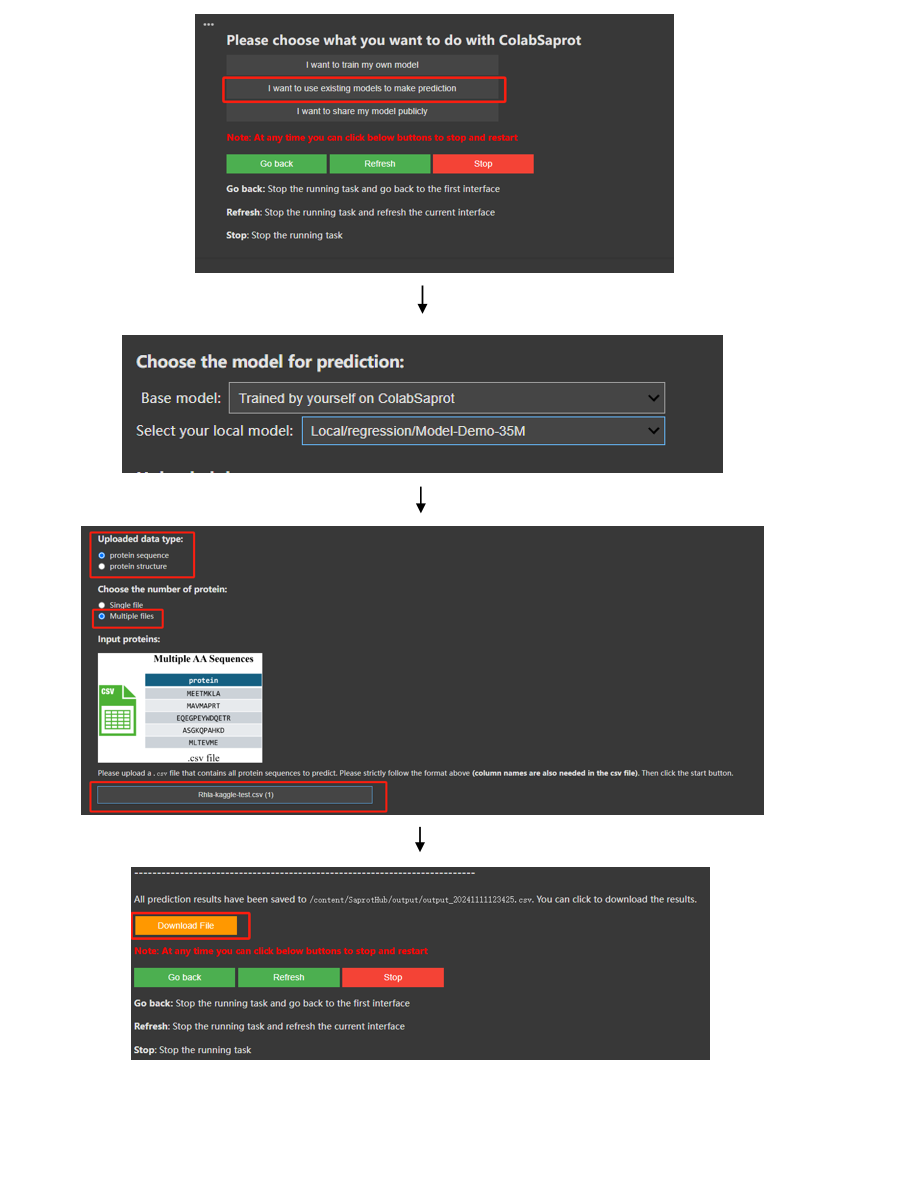